# Drug Consumption: Mais Testes com Classificadores

In [1]:
import pandas as pd
import utils as ut

from importlib import reload
reload(ut)

/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<module 'utils' from '/home/ngmonteiro/llm_experiments/ufes/2024-1-P1-Drug-Consumption/utils.py'>

In [2]:
data = pd.read_csv('data/drug_consumption_preprocessed.csv', index_col="ID")
pd.set_option('display.max_columns', None)

### Filtragens

In [3]:
print(data["Semer"].value_counts())

# Versão sem os indivíduos menos confiáveis.
data_filtered = data[data["Semer"] == 0]

0    1877
2       3
3       2
1       2
4       1
Name: Semer, dtype: int64


In [4]:
# Ignorando o país de residência + nominais + droga fictícia + etnia.
ignore_cols = ["Country", "Age_", "Education_", "Semer", "Semer_", "Ethnicity"] + [
    x + "_" for x in ut.drugs
]
X = data_filtered.drop(columns=ut.drugs + ignore_cols)
y = data_filtered[ut.drugs]

# Observações e Mini-Experimentos

### Análise somente com métricas de personalidade
Tentamos descobrir as relações entre as métricas e as substâncias, de forma que outras características sejam ocultas.

/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed i

Substância                      Alcohol              Amphet            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.499723  0.000782  0.630561  0.038594   
BernoulliNB                    0.500000  0.000000  0.640678  0.048271   
CalibratedClassifierCV         0.500000  0.000000  0.641936  0.045460   
GaussianNB                     0.500000  0.000000  0.660388  0.051431   
LabelPropagation               0.508488  0.047829  0.572299  0.036675   
LabelSpreading                 0.508764  0.047576  0.572377  0.038149   
LinearDiscriminantAnalysis     0.500000  0.000000  0.640300  0.043508   
NearestCentroid                0.602061  0.093623  0.682556  0.052323   
QuadraticDiscriminantAnalysis  0.500000  0.000000  0.633220  0.038849   

Substância                         Amyl              Benzos            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.500173  0.009202  0.620413  0.035295   
BernoulliNB                    0.500000  0.000000  0.642083  0.043265   
CalibratedClassifierCV         0.500000  0.000000  0.640012  0.034849   
GaussianNB                     0.497159  0.009148  0.649064  0.051002   
LabelPropagation               0.531003  0.046695  0.579364  0.024990   
LabelSpreading                 0.530968  0.048352  0.579599  0.027389   
LinearDiscriminantAnalysis     0.499669  0.000935  0.643648  0.031741   
NearestCentroid                0.599564  0.040144  0.671089  0.036335   
QuadraticDiscriminantAnalysis  0.495063  0.008458  0.636995  0.037130   

Substância                         Caff            Cannabis            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.498913  0.001643  0.708531  0.049500   
BernoulliNB                    0.500000  0.000000  0.695137  0.049280   
CalibratedClassifierCV         0.500000  0.000000  0.698755  0.044067   
GaussianNB                     0.500000  0.000000  0.718993  0.057131   
LabelPropagation               0.507473  0.045324  0.642660  0.039084   
LabelSpreading                 0.491848  0.006548  0.642254  0.038474   
LinearDiscriminantAnalysis     0.500000  0.000000  0.693890  0.044229   
NearestCentroid                0.664946  0.103632  0.724390  0.054654   
QuadraticDiscriminantAnalysis  0.500000  0.000000  0.701676  0.055416   

Substância                         Choc                Coke            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.499457  0.001006  0.629445  0.026425   
BernoulliNB                    0.500000  0.000000  0.631033  0.015739   
CalibratedClassifierCV         0.500000  0.000000  0.627958  0.032430   
GaussianNB                     0.500000  0.000000  0.642557  0.036080   
LabelPropagation               0.531405  0.058227  0.578060  0.041700   
LabelSpreading                 0.531947  0.057784  0.577110  0.043023   
LinearDiscriminantAnalysis     0.500000  0.000000  0.626150  0.032680   
NearestCentroid                0.460186  0.084667  0.667352  0.038924   
QuadraticDiscriminantAnalysis  0.499729  0.000765  0.617117  0.038804   

Substância                        Crack             Ecstasy            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.495856  0.003290  0.678021  0.041180   
BernoulliNB                    0.499459  0.001530  0.681658  0.049017   
CalibratedClassifierCV         0.499704  0.000838  0.687100  0.056182   
GaussianNB                     0.534138  0.034533  0.6

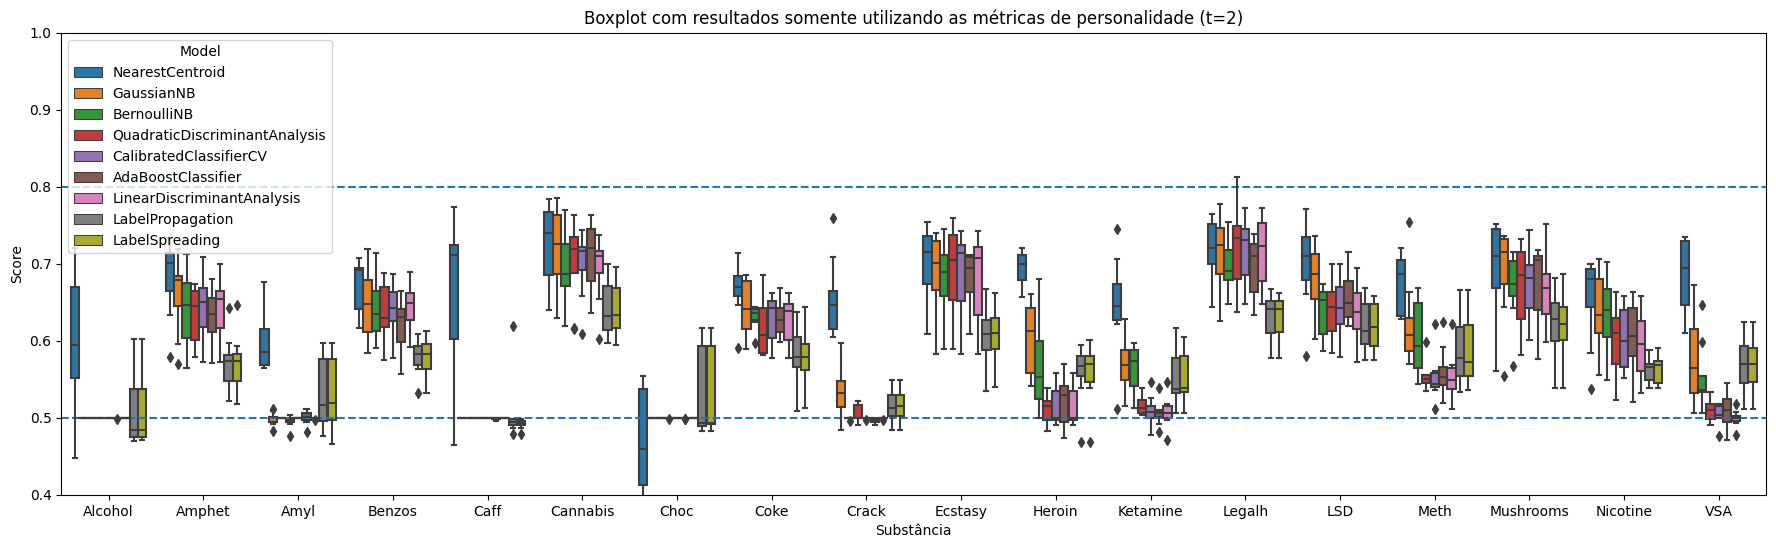

In [5]:
x_ = X[ut.numCols]
labels = data_filtered[ut.drugs].applymap(ut.threshold, t=[2])

results, cm = ut.test_classifiers(x_, labels)

ut.boxplot(results, title=f"Boxplot com resultados somente utilizando as métricas de personalidade (t={2})")
ut.show_statistics(results)

#### Confusion Matrices

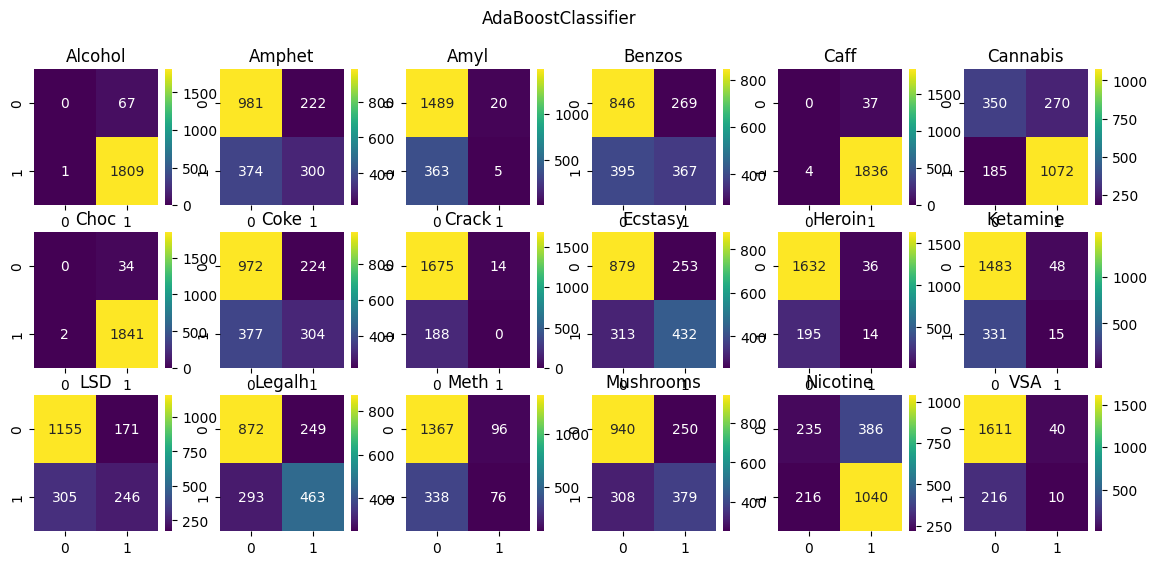

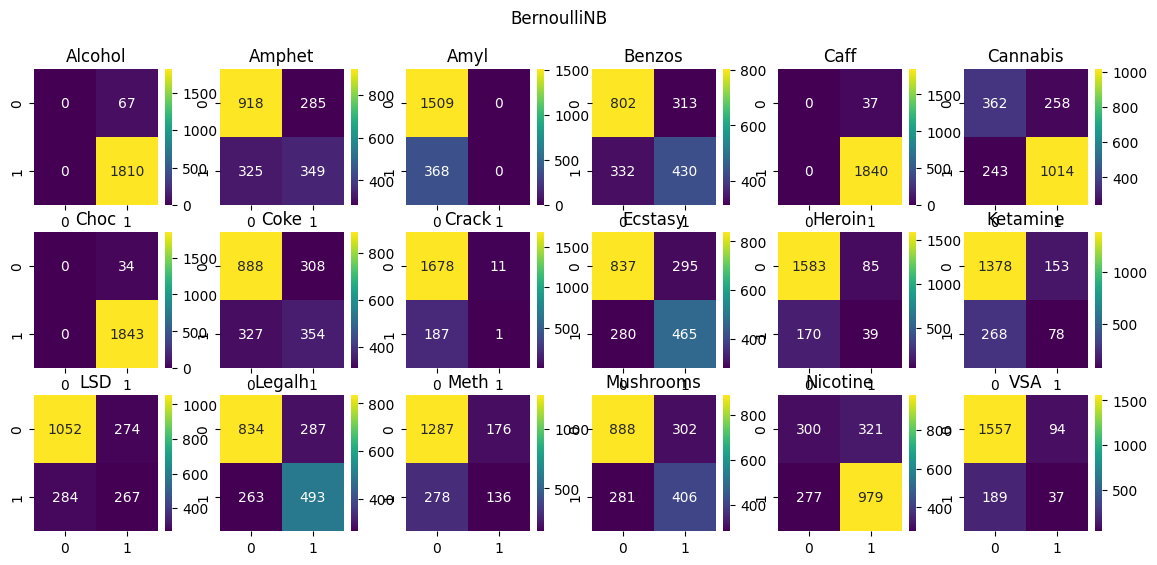

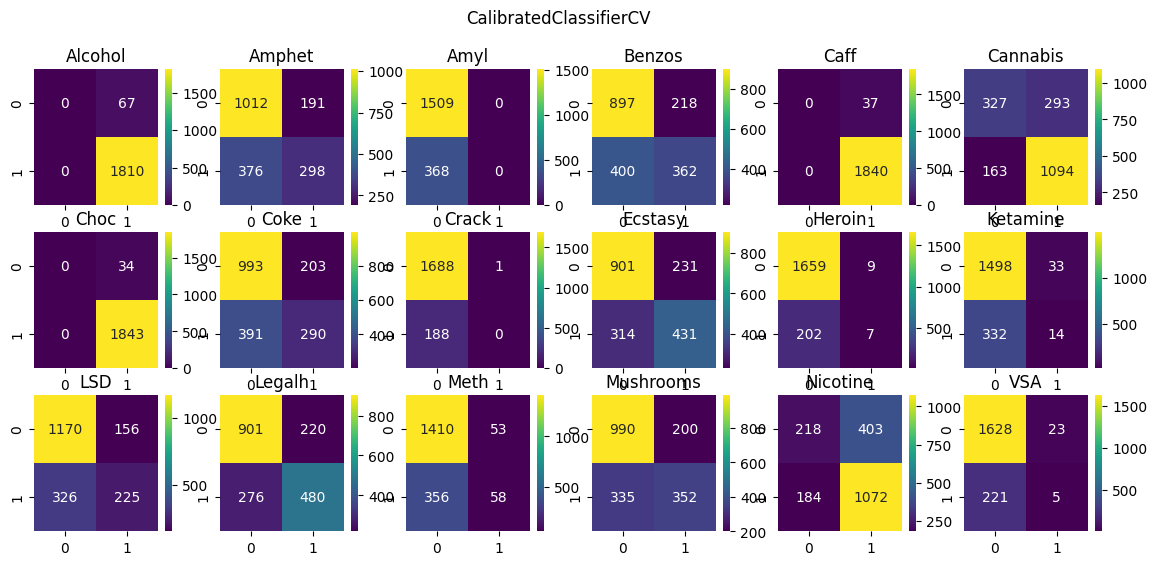

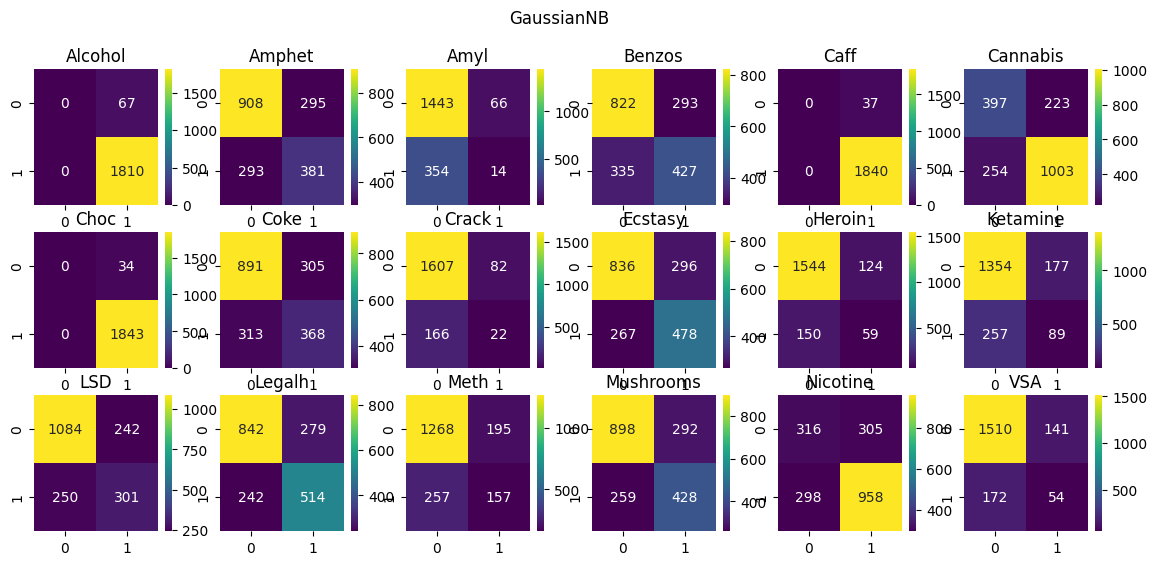

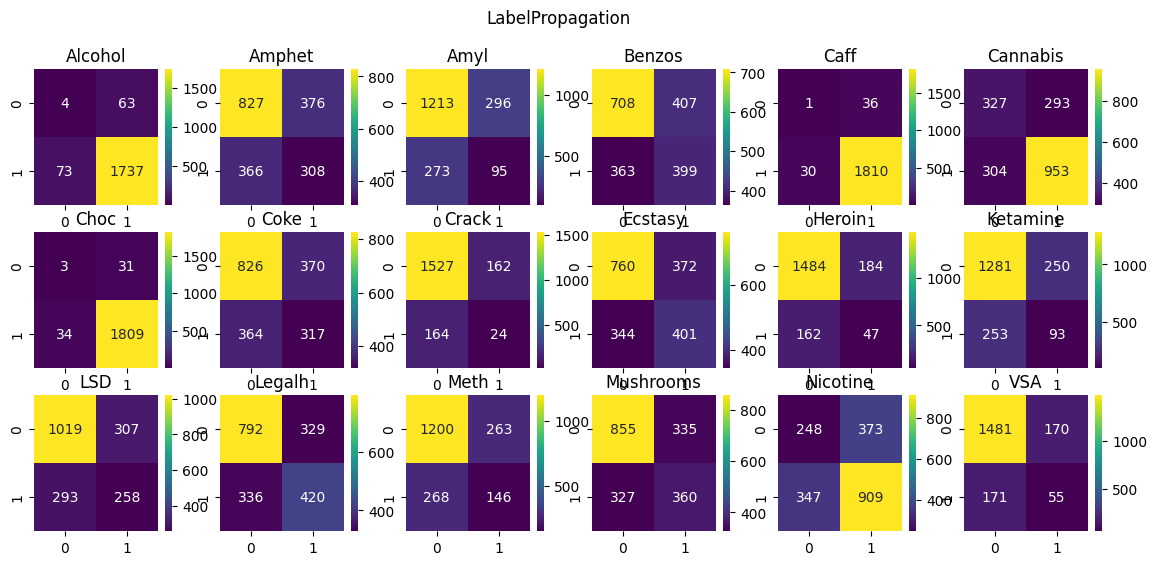

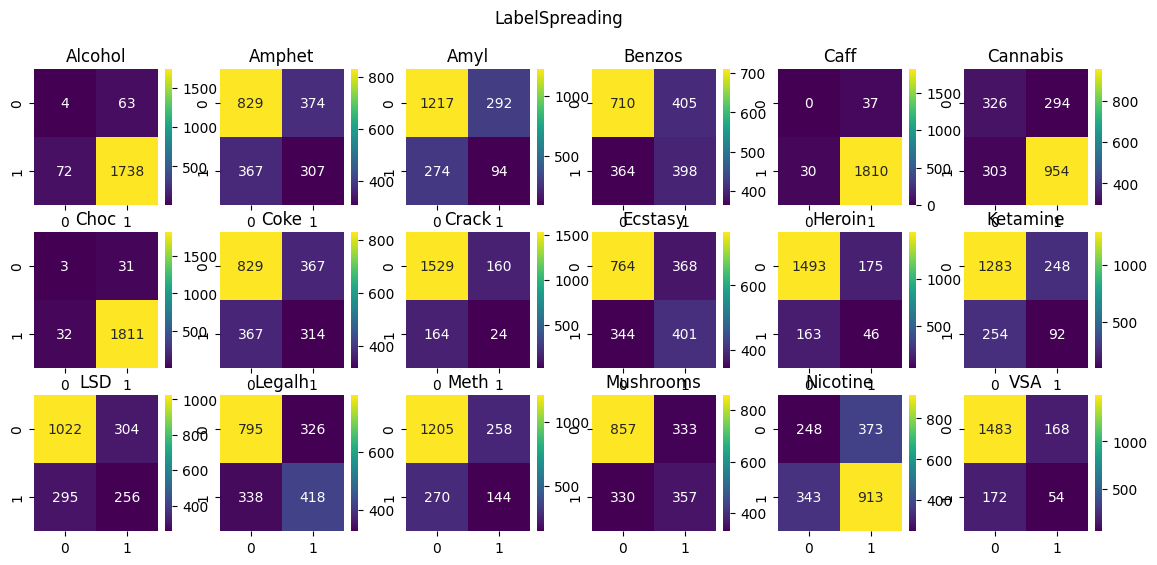

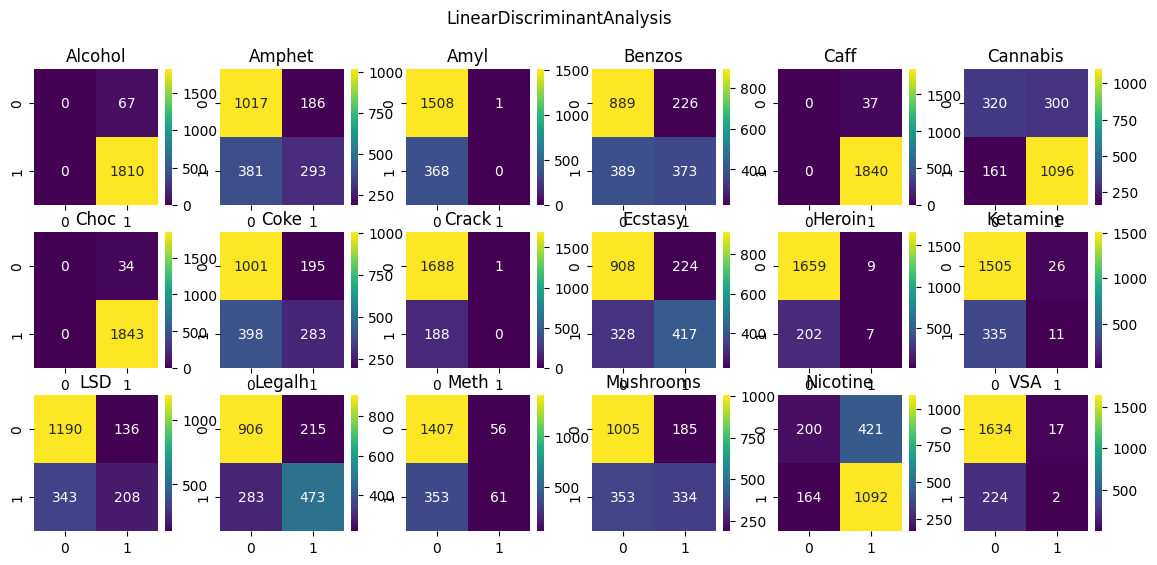

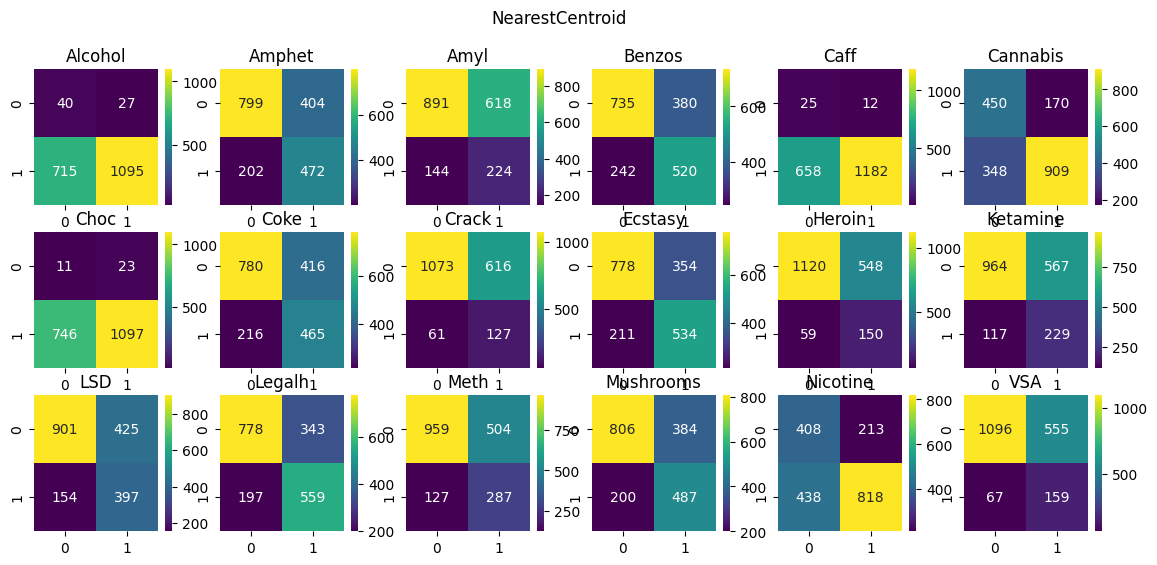

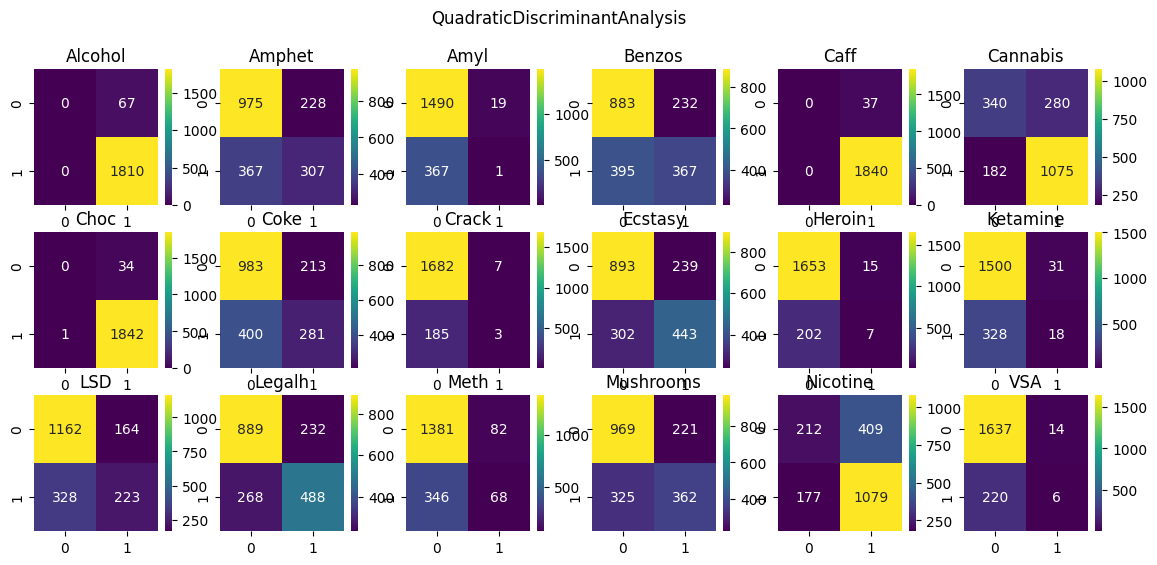

In [6]:
ut.confusion(cm)

### Análise em um range de idades
Tentamos classificar somente com dados de indívíduos entre 18 a 34 anos. Isso possibilitaria determinar um threshold menor de tempo de uso de uma substância (no último mês, por exemplo).

/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed i

Substância                      Alcohol              Amphet            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.506657  0.031140  0.606970  0.058955   
BernoulliNB                    0.500000  0.000000  0.658390  0.046042   
CalibratedClassifierCV         0.500000  0.000000  0.612851  0.058506   
GaussianNB                     0.499060  0.002658  0.652097  0.043686   
LabelPropagation               0.510338  0.036821  0.596245  0.044632   
LabelSpreading                 0.510338  0.036821  0.598268  0.045438   
LinearDiscriminantAnalysis     0.500000  0.000000  0.606122  0.059305   
NearestCentroid                0.549029  0.080286  0.662365  0.041205   
QuadraticDiscriminantAnalysis  0.498590  0.002797  0.627322  0.074928   

Substância                         Amyl              Benzos            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.500468  0.015682  0.571893  0.049822   
BernoulliNB                    0.500000  0.000000  0.599739  0.040376   
CalibratedClassifierCV         0.500000  0.000000  0.596049  0.043197   
GaussianNB                     0.499004  0.001844  0.614552  0.045728   
LabelPropagation               0.552651  0.051024  0.537126  0.058707   
LabelSpreading                 0.553147  0.051164  0.537126  0.058191   
LinearDiscriminantAnalysis     0.500000  0.000000  0.604901  0.039765   
NearestCentroid                0.566357  0.086933  0.633067  0.065162   
QuadraticDiscriminantAnalysis  0.497016  0.005512  0.605533  0.034636   

Substância                         Caff            Cannabis            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.497706  0.001900  0.746250  0.067061   
BernoulliNB                    0.499544  0.001290  0.728732  0.082453   
CalibratedClassifierCV         0.500000  0.000000  0.758648  0.078920   
GaussianNB                     0.497249  0.002586  0.756128  0.068688   
LabelPropagation               0.505069  0.044152  0.680217  0.048193   
LabelSpreading                 0.505069  0.044152  0.680217  0.048193   
LinearDiscriminantAnalysis     0.500000  0.000000  0.768328  0.088284   
NearestCentroid                0.618205  0.088257  0.750701  0.083346   
QuadraticDiscriminantAnalysis  0.498625  0.001898  0.762173  0.075719   

Substância                         Choc                Coke            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.496807  0.004109  0.587334  0.038610   
BernoulliNB                    0.500000  0.000000  0.584235  0.036592   
CalibratedClassifierCV         0.500000  0.000000  0.570053  0.030983   
GaussianNB                     0.500000  0.000000  0.620040  0.030139   
LabelPropagation               0.599145  0.085232  0.578100  0.029525   
LabelSpreading                 0.599145  0.085232  0.577942  0.028620   
LinearDiscriminantAnalysis     0.500000  0.000000  0.578866  0.028412   
NearestCentroid                0.403448  0.098119  0.650268  0.046390   
QuadraticDiscriminantAnalysis  0.499544  0.001290  0.588019  0.039428   

Substância                        Crack             Ecstasy            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.534497  0.029022  0.626759  0.053873   
BernoulliNB                    0.500000  0.000000  0.642335  0.048366   
CalibratedClassifierCV         0.500000  0.000000  0.644246  0.045572   
GaussianNB                     0.541531  0.079766  0.6

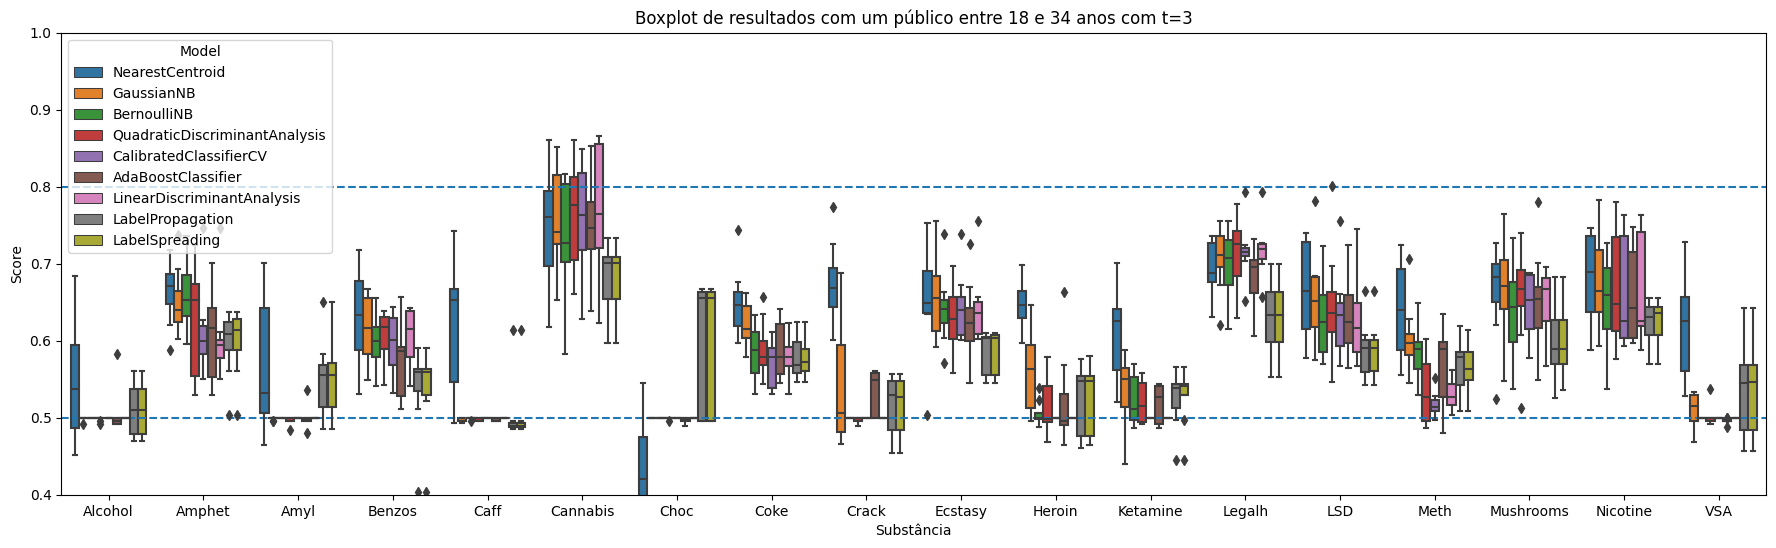

In [7]:
mask = data_filtered["Age"] < 2

x_ = X[mask]
labels = y[mask].applymap(ut.threshold, t=[3])

results, cm = ut.test_classifiers(x_.drop(columns=["Age"]), labels)

ut.boxplot(results, title="Boxplot de resultados com um público entre 18 e 34 anos com t=3")
ut.show_statistics(results)

#### Confusion Matrices

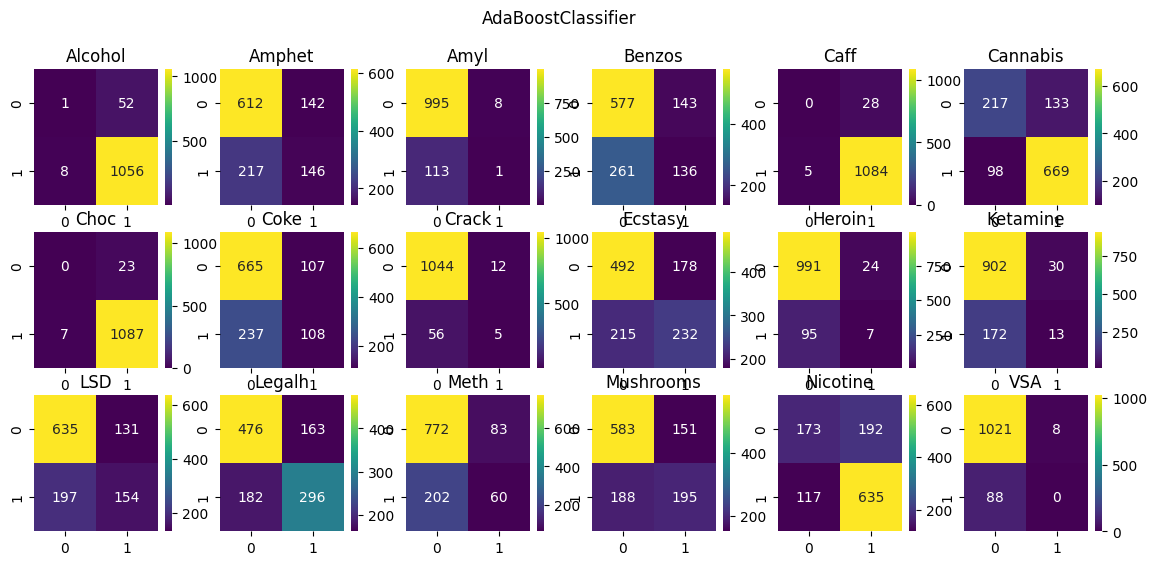

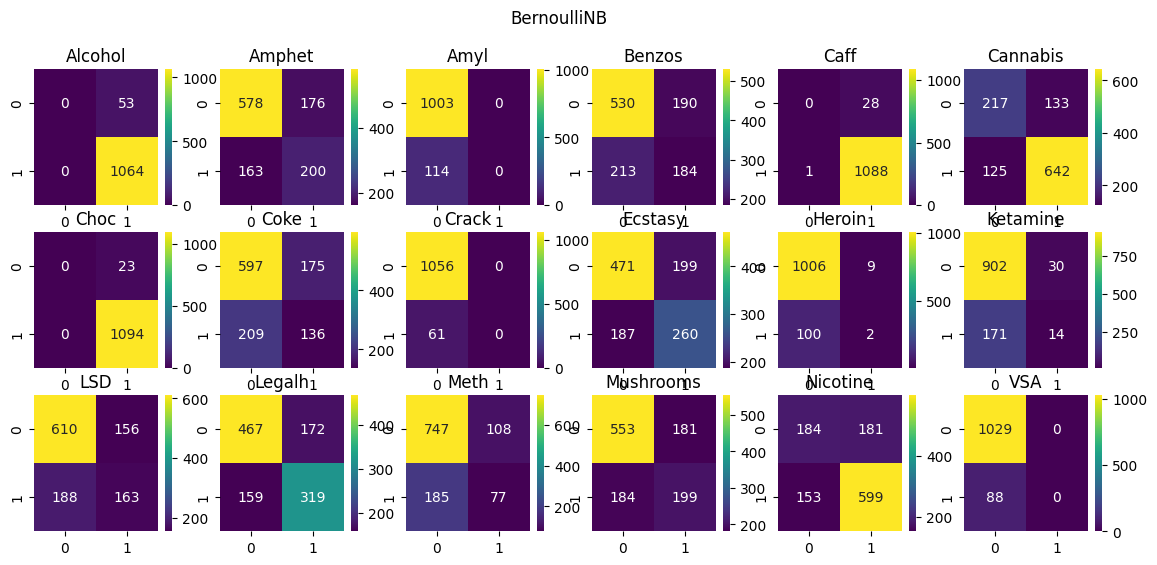

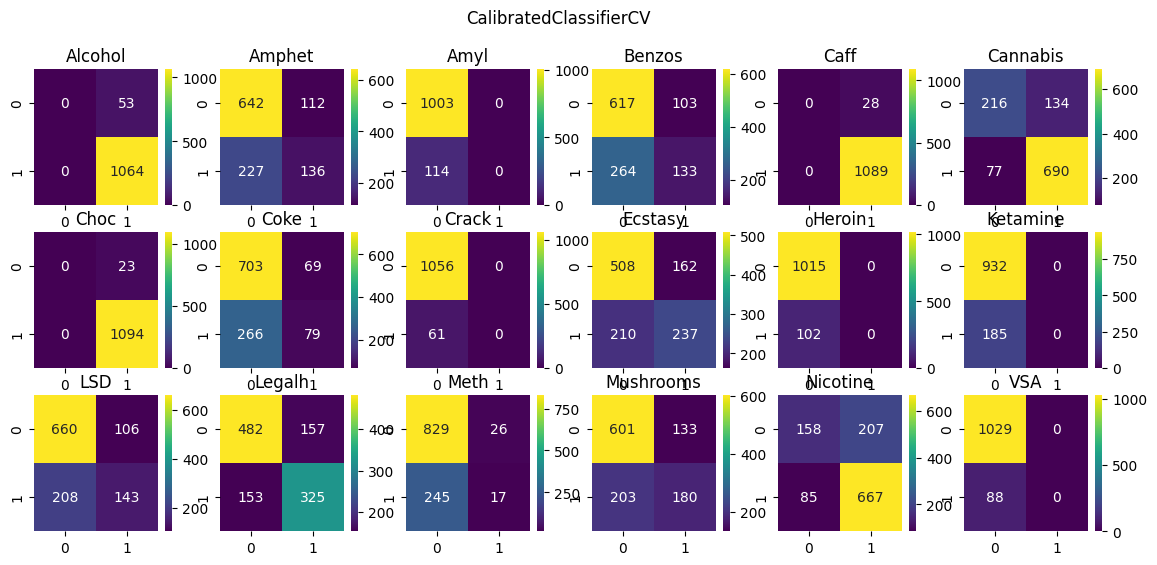

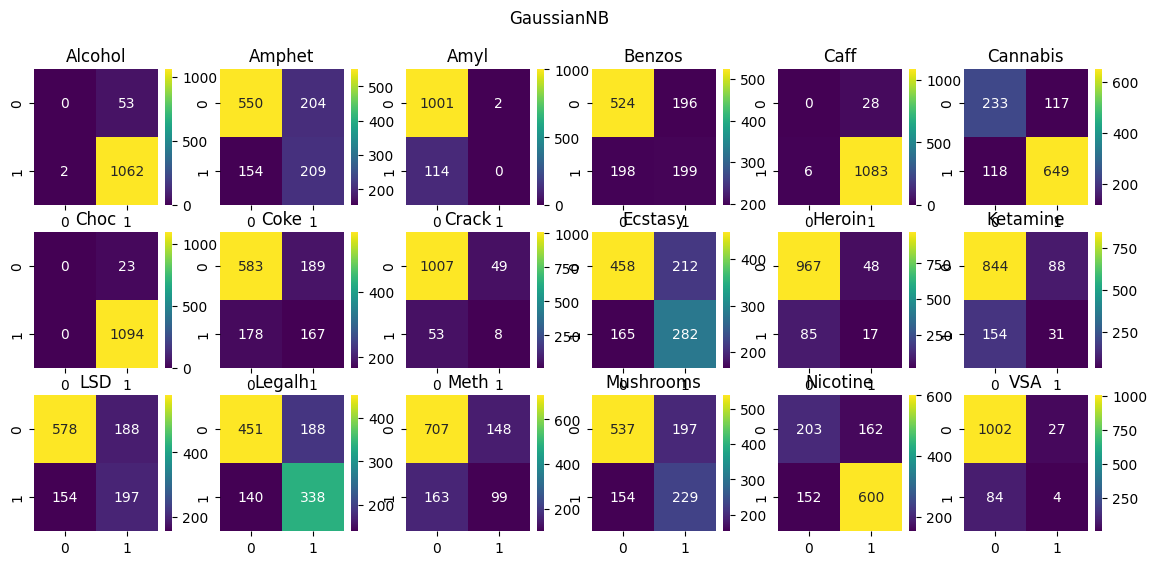

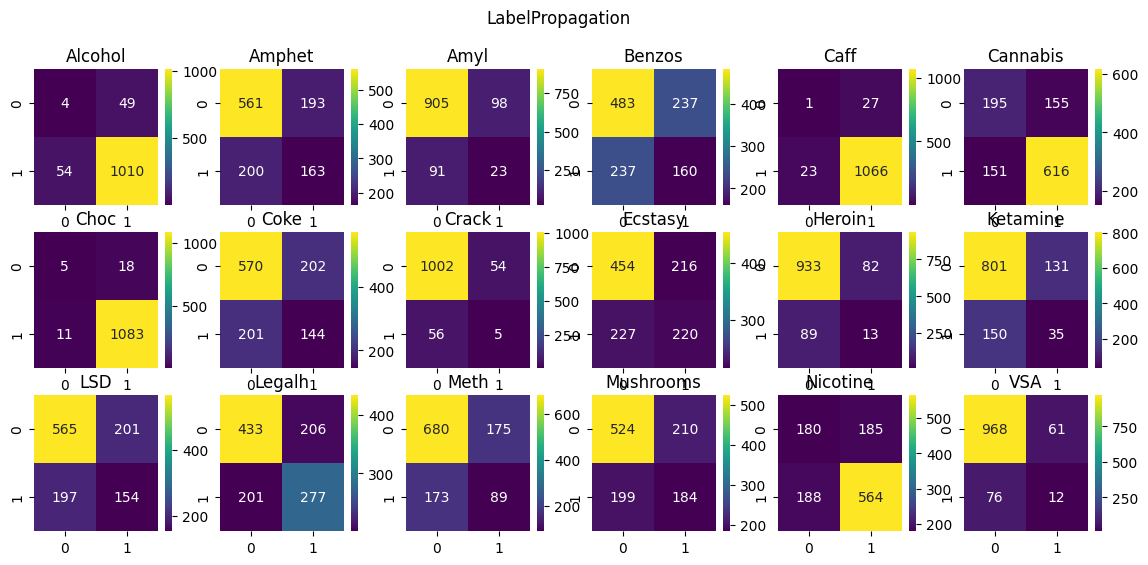

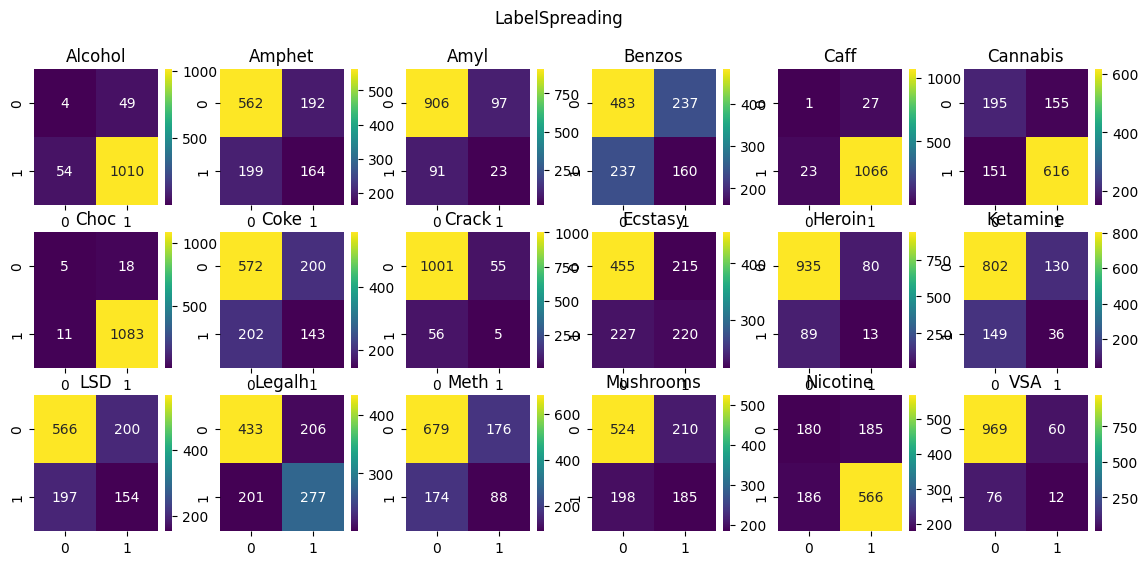

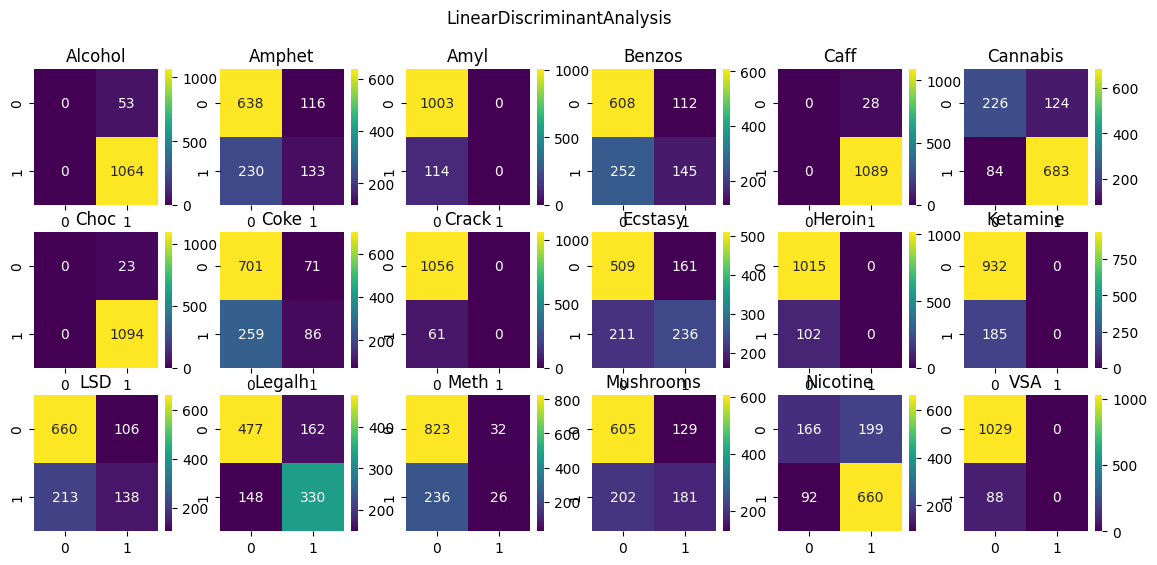

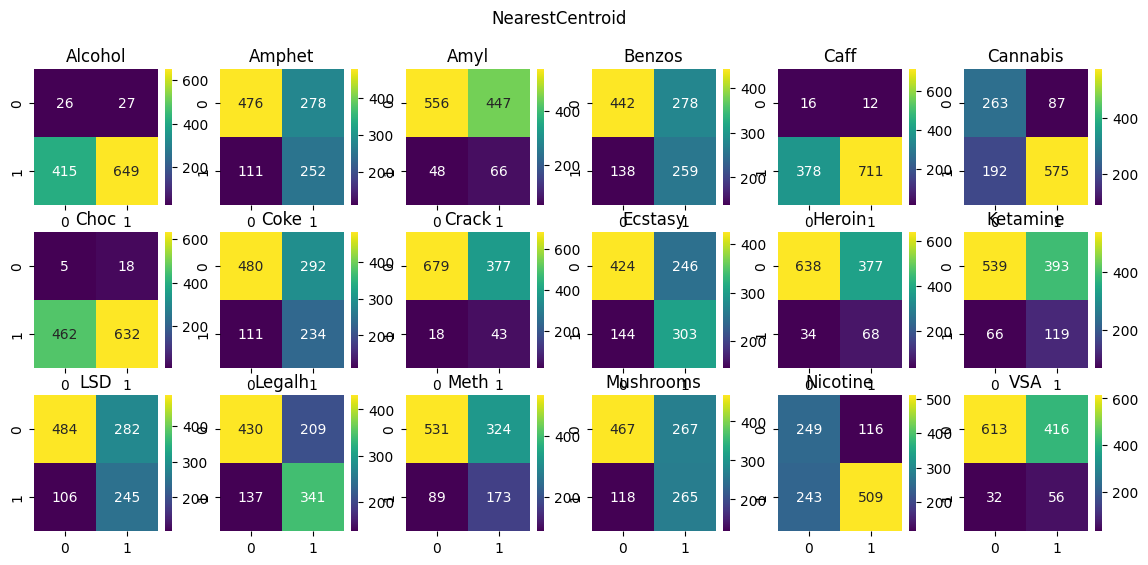

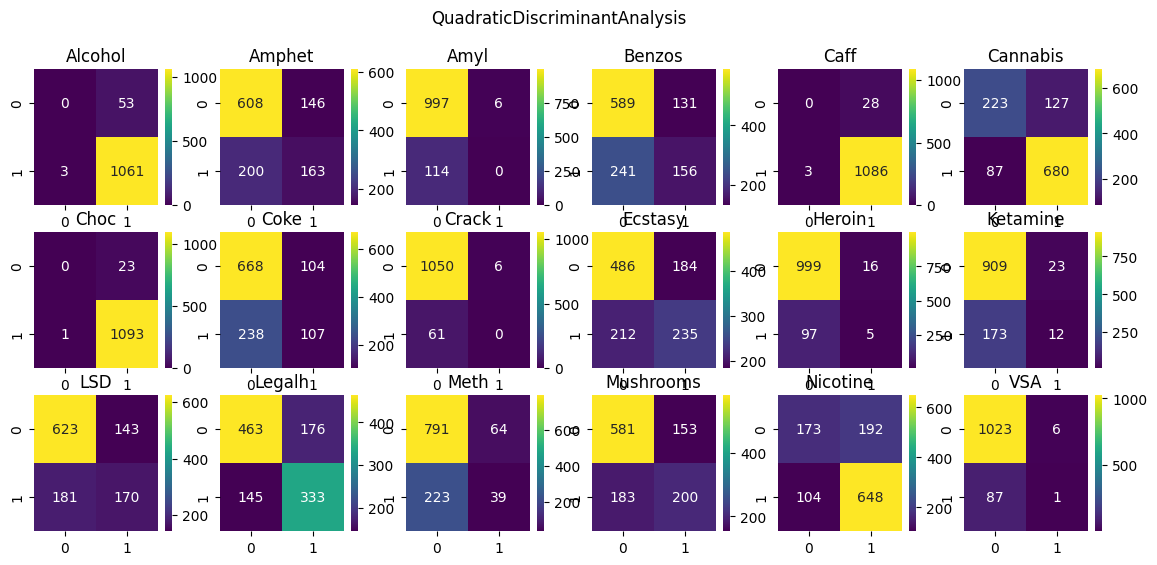

In [8]:
ut.confusion(cm)

### Análise com PCA
Tentamos aplicar algum tipo de redução de dimensionalidade para observar se há melhorias.

/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed i

Substância                      Alcohol              Amphet            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.497244  0.003860  0.658060  0.056287   
BernoulliNB                    0.500000  0.000000  0.635534  0.063549   
CalibratedClassifierCV         0.500000  0.000000  0.666928  0.062445   
GaussianNB                     0.498348  0.004673  0.664785  0.065818   
LabelPropagation               0.501784  0.045783  0.588457  0.036869   
LabelSpreading                 0.502061  0.046053  0.591192  0.036131   
LinearDiscriminantAnalysis     0.500000  0.000000  0.656830  0.060788   
NearestCentroid                0.634317  0.072500  0.706894  0.071966   
QuadraticDiscriminantAnalysis  0.512001  0.028213  0.675477  0.075702   

Substância                         Amyl              Benzos            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.513186  0.021543  0.628762  0.039675   
BernoulliNB                    0.500000  0.000000  0.610265  0.045504   
CalibratedClassifierCV         0.504105  0.012634  0.638932  0.036562   
GaussianNB                     0.499668  0.000940  0.635888  0.047519   
LabelPropagation               0.547146  0.039596  0.552820  0.020815   
LabelSpreading                 0.544065  0.038458  0.552816  0.018450   
LinearDiscriminantAnalysis     0.501359  0.003843  0.640128  0.039045   
NearestCentroid                0.612542  0.067321  0.646157  0.054623   
QuadraticDiscriminantAnalysis  0.494767  0.009216  0.634516  0.047937   

Substância                         Caff            Cannabis            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.498370  0.003019  0.740987  0.046605   
BernoulliNB                    0.500000  0.000000  0.688840  0.075415   
CalibratedClassifierCV         0.500000  0.000000  0.759358  0.060191   
GaussianNB                     0.499728  0.000769  0.734931  0.069630   
LabelPropagation               0.489130  0.007440  0.689145  0.042272   
LabelSpreading                 0.489402  0.007389  0.688747  0.042596   
LinearDiscriminantAnalysis     0.500000  0.000000  0.753707  0.062540   
NearestCentroid                0.652717  0.073294  0.763441  0.072227   
QuadraticDiscriminantAnalysis  0.509783  0.035702  0.750948  0.064112   

Substância                         Choc                Coke            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.497828  0.002846  0.631674  0.059892   
BernoulliNB                    0.500000  0.000000  0.609488  0.047003   
CalibratedClassifierCV         0.500000  0.000000  0.633616  0.030860   
GaussianNB                     0.500000  0.000000  0.621303  0.038257   
LabelPropagation               0.527736  0.076343  0.588897  0.035851   
LabelSpreading                 0.528007  0.076208  0.590468  0.036177   
LinearDiscriminantAnalysis     0.500000  0.000000  0.614381  0.029695   
NearestCentroid                0.525889  0.142796  0.679141  0.062113   
QuadraticDiscriminantAnalysis  0.499728  0.000769  0.628749  0.043126   

Substância                        Crack             Ecstasy            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.505075  0.024789  0.697328  0.054182   
BernoulliNB                    0.500000  0.000000  0.668915  0.062805   
CalibratedClassifierCV         0.499408  0.001097  0.731070  0.059625   
GaussianNB                     0.501533  0.007411  0.7

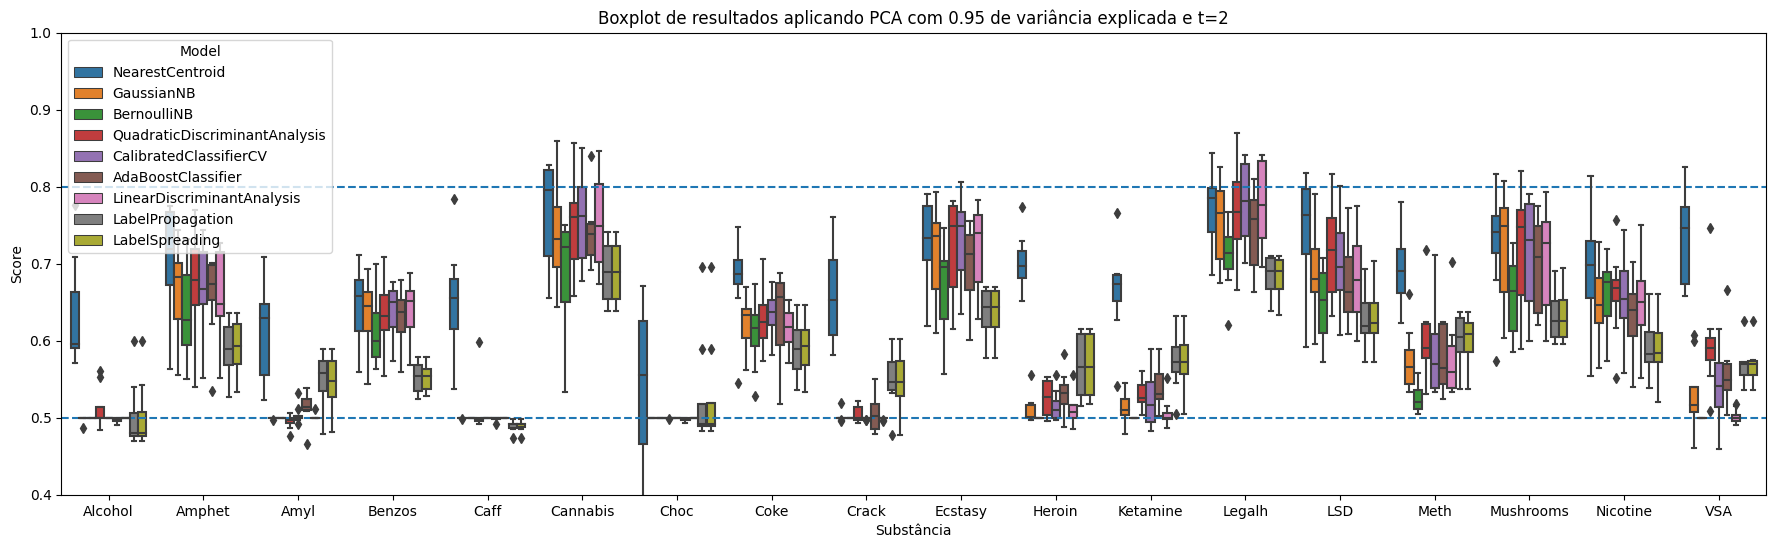

In [9]:
from sklearn.decomposition import PCA

pca_comp = 0.95
labels = y.applymap(ut.threshold)

results, cm = ut.test_classifiers(
        X, labels, pipe=(ut.metric_preprocessor(), PCA(n_components=pca_comp)))

ut.boxplot(results, title=f"Boxplot de resultados aplicando PCA com {pca_comp} de variância explicada e t=2")
ut.show_statistics(results)

#### Confusion Matrices

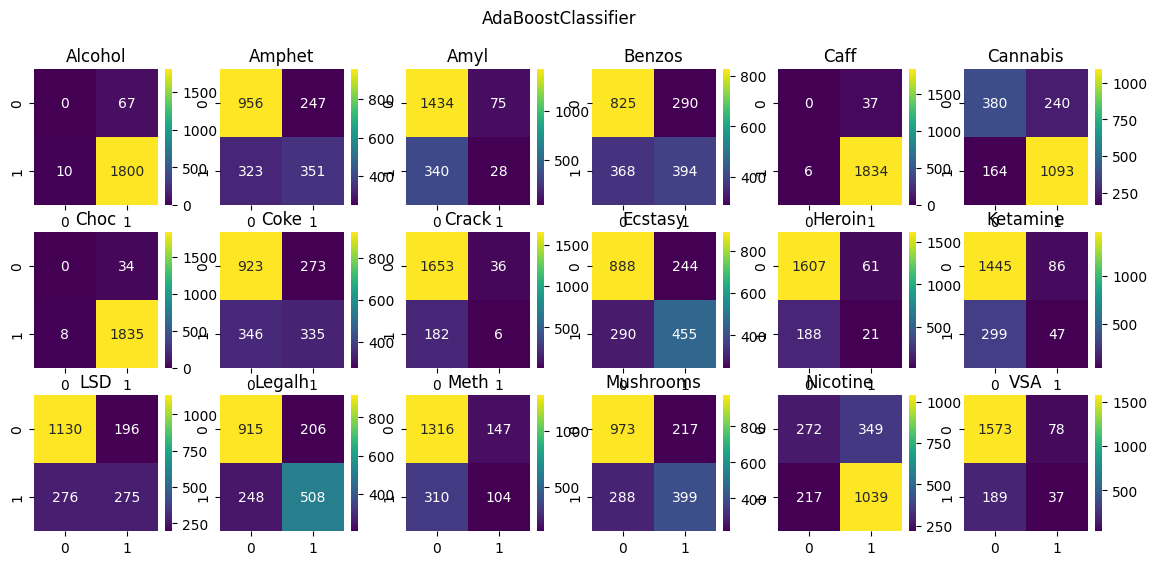

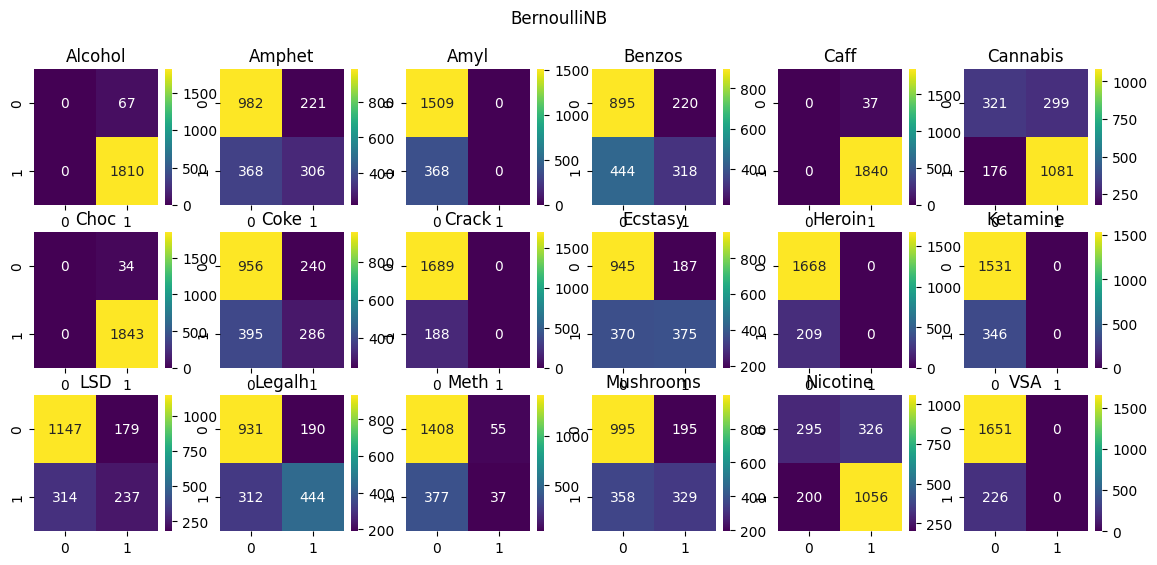

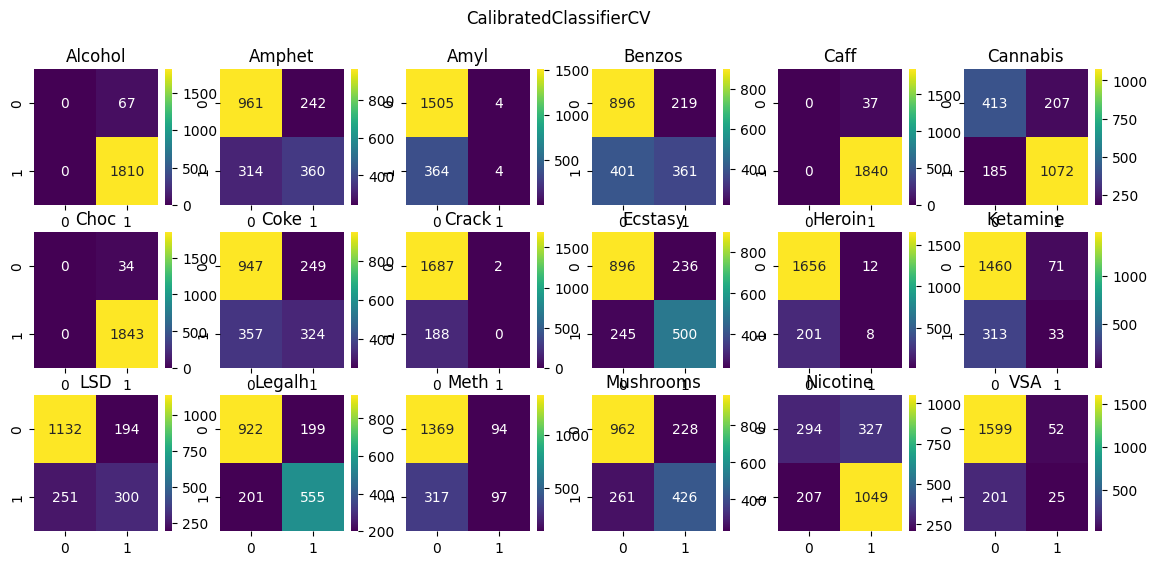

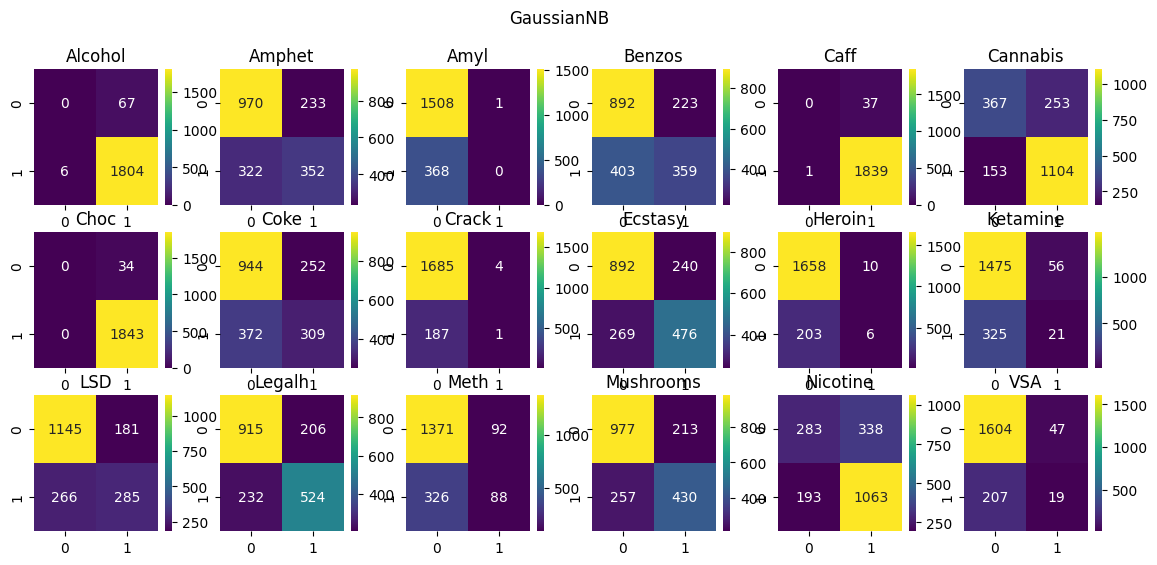

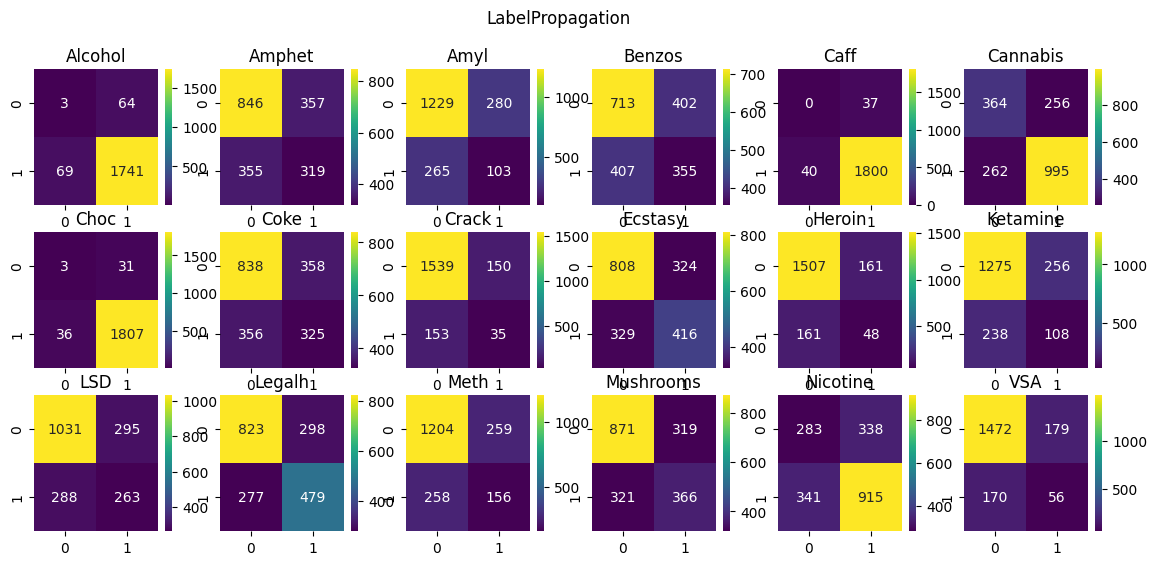

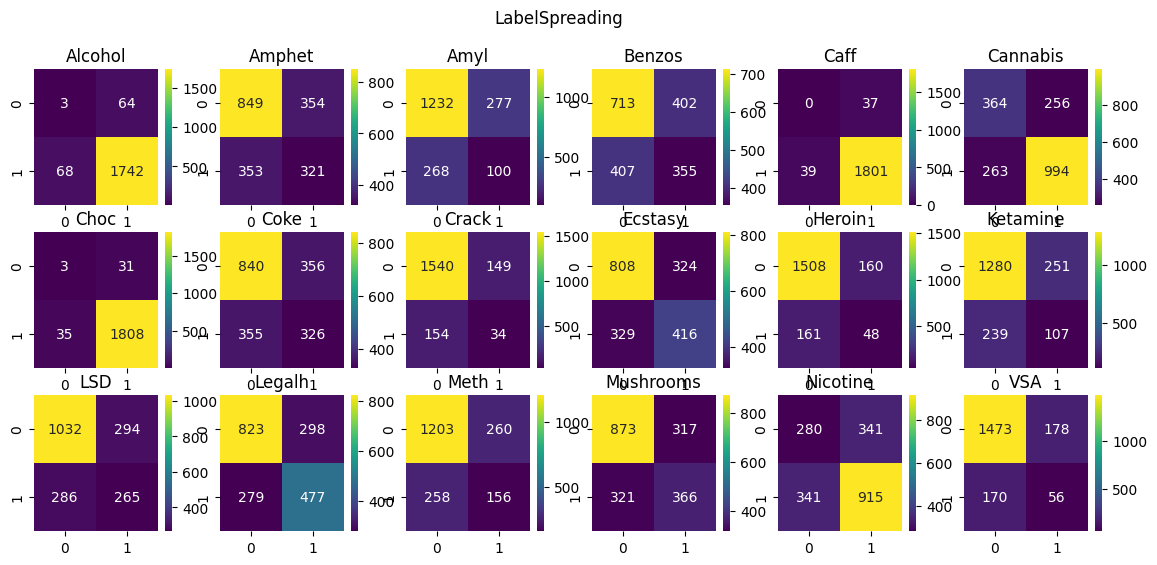

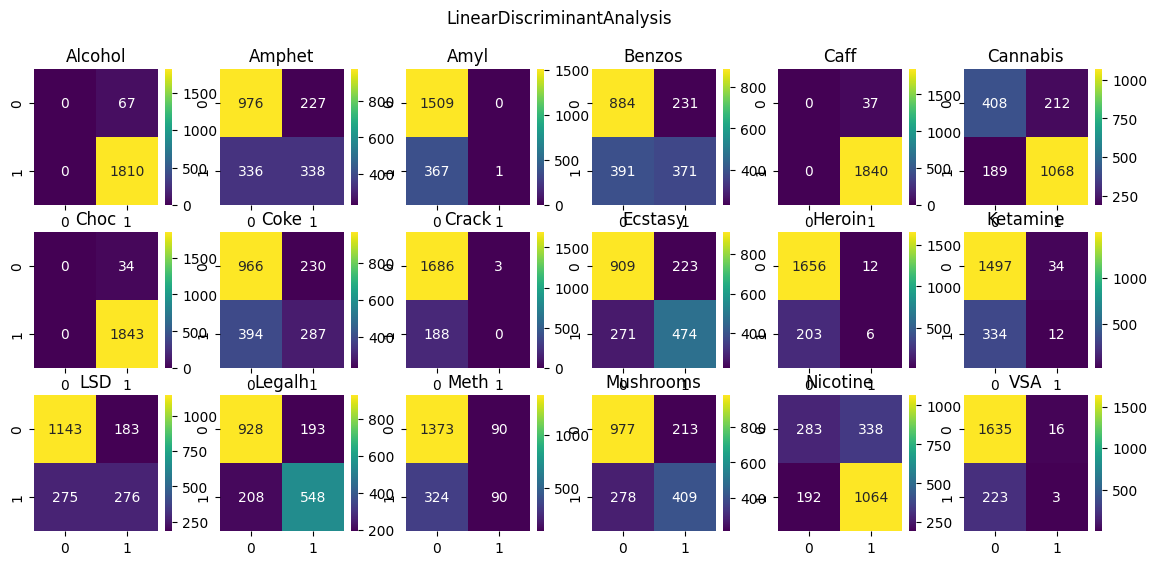

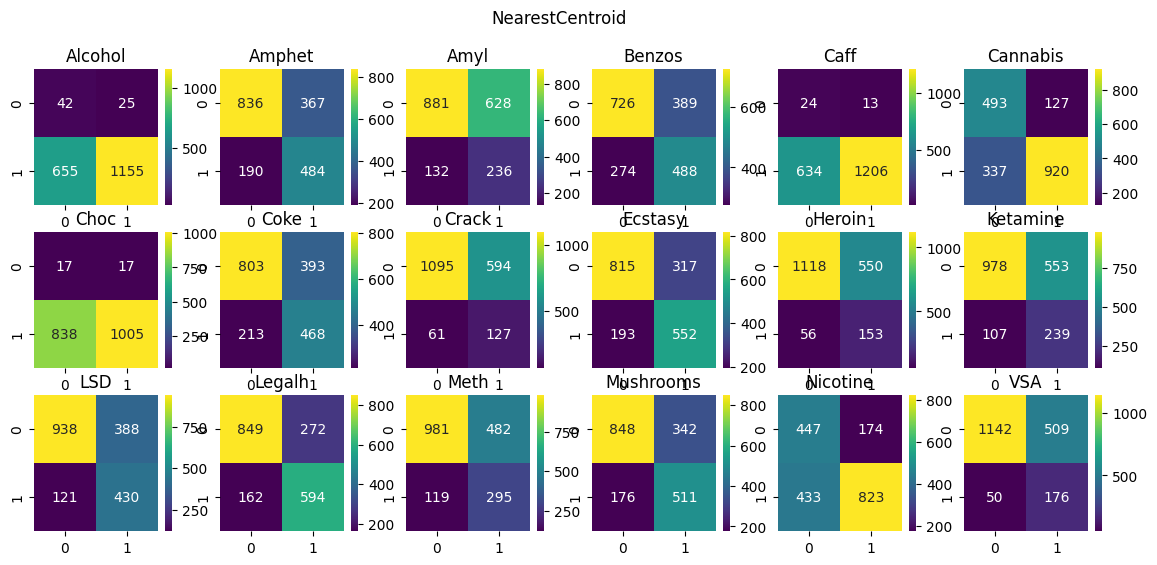

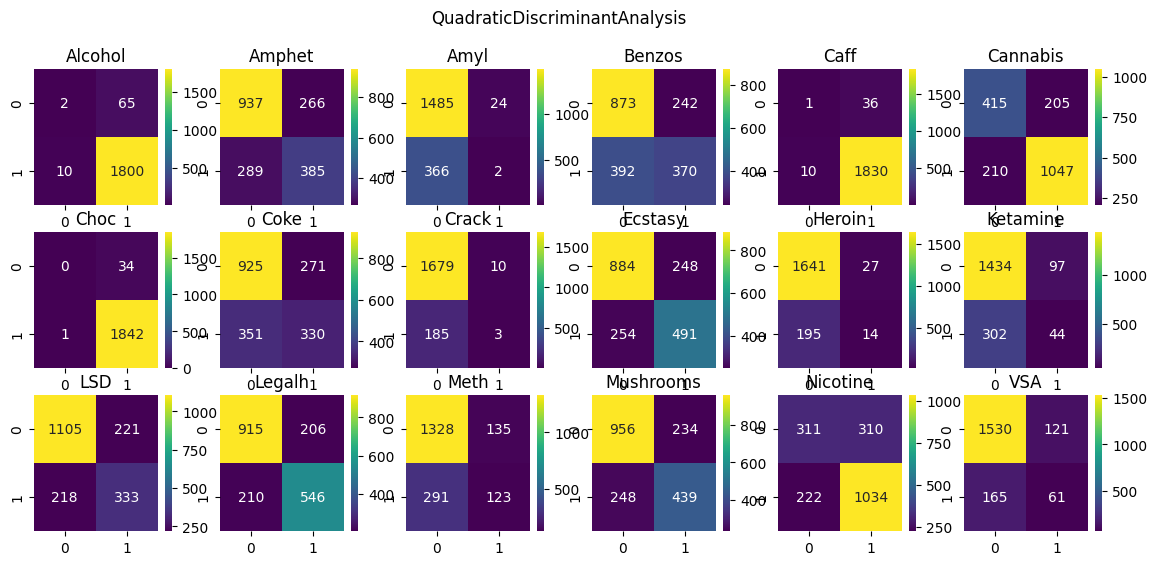

In [10]:
ut.confusion(cm)

## Tratando como Multiclasse
Ao invés de tentar detectar somente dentro de um período de tempo, podemos separar em blocos maiores, de forma que possamos interpretar melhor os resultados.

Ex.: se separarmos entre década, ano e mês, podemos saber separar pessoas que
 - nunca usaram ou experimentaram pouco;
 - pararam de usar recentemente;
 - continuam usando.

/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed i

Substância                      Alcohol              Amphet            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.330288  0.007400  0.408598  0.048486   
BernoulliNB                    0.332869  0.004869  0.438321  0.052514   
CalibratedClassifierCV         0.334166  0.002356  0.412598  0.037934   
GaussianNB                     0.347954  0.042034  0.461040  0.056674   
LabelPropagation               0.338486  0.039904  0.402813  0.024311   
LabelSpreading                 0.338918  0.039413  0.402889  0.024134   
LinearDiscriminantAnalysis     0.335214  0.005320  0.420012  0.049013   
NearestCentroid                0.458046  0.066345  0.513754  0.077727   
QuadraticDiscriminantAnalysis  0.344284  0.024461  0.436343  0.053274   

Substância                         Amyl              Benzos            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.336150  0.011168  0.397346  0.039037   
BernoulliNB                    0.339779  0.012057  0.428255  0.052853   
CalibratedClassifierCV         0.333333  0.000000  0.390117  0.038092   
GaussianNB                     0.345477  0.024973  0.451157  0.028853   
LabelPropagation               0.353856  0.037968  0.397204  0.029626   
LabelSpreading                 0.354298  0.038199  0.396075  0.028733   
LinearDiscriminantAnalysis     0.333333  0.000000  0.402900  0.029220   
NearestCentroid                0.480005  0.076957  0.471520  0.058140   
QuadraticDiscriminantAnalysis  0.347736  0.028109  0.416111  0.028038   

Substância                         Caff            Cannabis            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.342010  0.023648  0.560575  0.062351   
BernoulliNB                    0.333144  0.000536  0.542691  0.038249   
CalibratedClassifierCV         0.333333  0.000000  0.561044  0.039056   
GaussianNB                     0.330679  0.003599  0.563137  0.055013   
LabelPropagation               0.326289  0.017365  0.497556  0.043007   
LabelSpreading                 0.326668  0.017740  0.498945  0.043774   
LinearDiscriminantAnalysis     0.333333  0.000000  0.592445  0.045717   
NearestCentroid                0.465792  0.075606  0.578732  0.069400   
QuadraticDiscriminantAnalysis  0.339199  0.024074  0.580226  0.047885   

Substância                         Choc                Coke            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.341878  0.030270  0.420422  0.027193   
BernoulliNB                    0.333333  0.000000  0.410400  0.018647   
CalibratedClassifierCV         0.333333  0.000000  0.393717  0.023998   
GaussianNB                     0.333333  0.000000  0.433894  0.023134   
LabelPropagation               0.378551  0.056182  0.395414  0.037727   
LabelSpreading                 0.378926  0.056209  0.394856  0.038200   
LinearDiscriminantAnalysis     0.333333  0.000000  0.394258  0.027347   
NearestCentroid                0.350620  0.122211  0.505365  0.062456   
QuadraticDiscriminantAnalysis  0.332584  0.001131  0.412418  0.026627   

Substância                        Crack             Ecstasy            \
                                   mean       std      mean       std   
Model                                                                   
AdaBoostClassifier             0.338928  0.016895  0.458668  0.030541   
BernoulliNB                    0.341702  0.010170  0.480327  0.041704   
CalibratedClassifierCV         0.333136  0.000559  0.463171  0.047577   
GaussianNB                     0.368973  0.037939  0.5

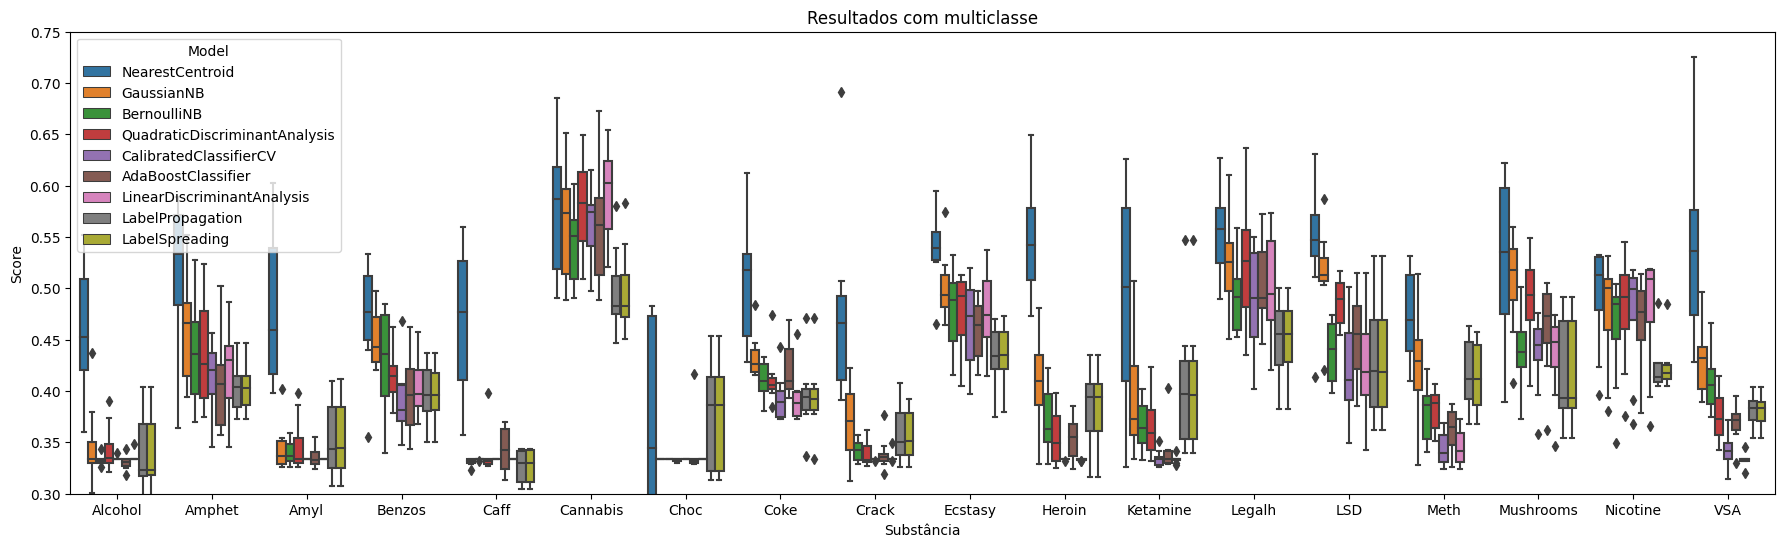

In [12]:
labels = y.applymap(ut.threshold, t=[2, 4])

results, cm = ut.test_classifiers(X, labels)

ut.boxplot(results, f"Resultados com multiclasse", lims=(0.3, 0.75), refs=None)
ut.show_statistics(results)

### Confusion Matrices

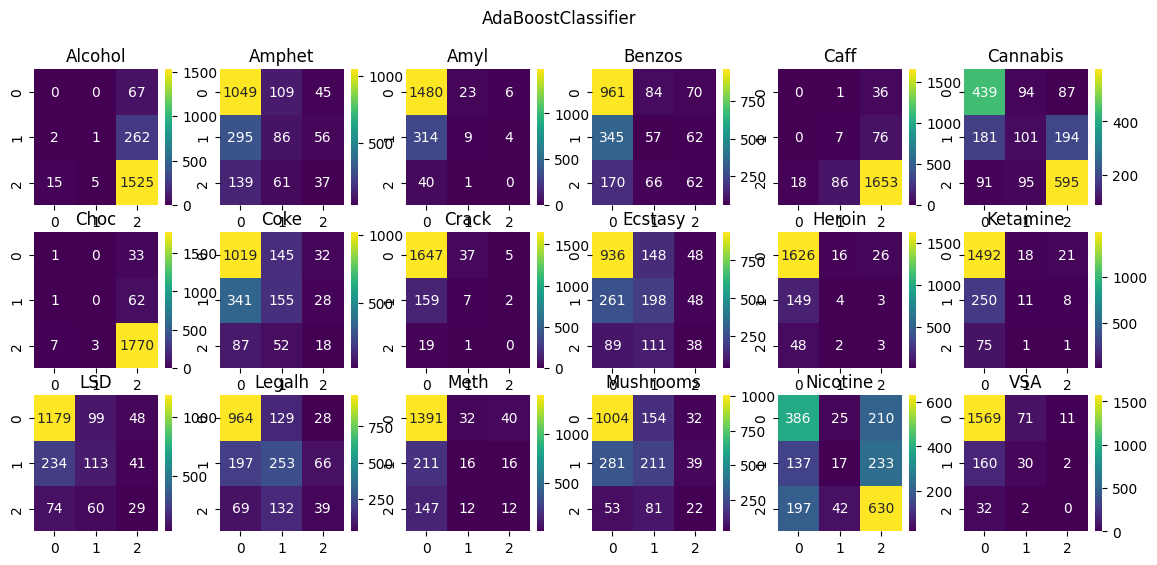

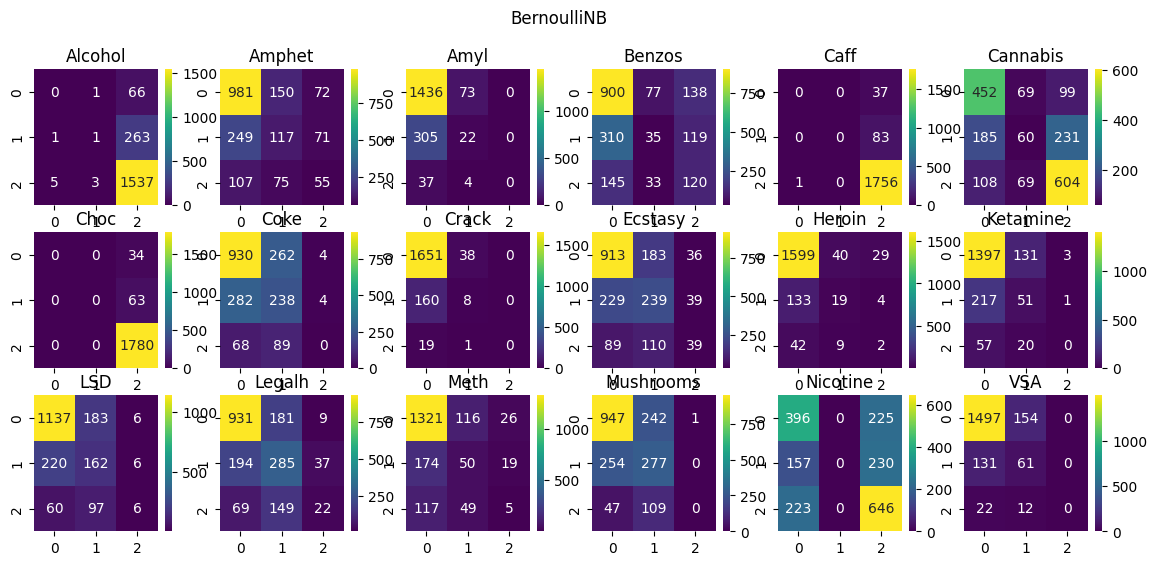

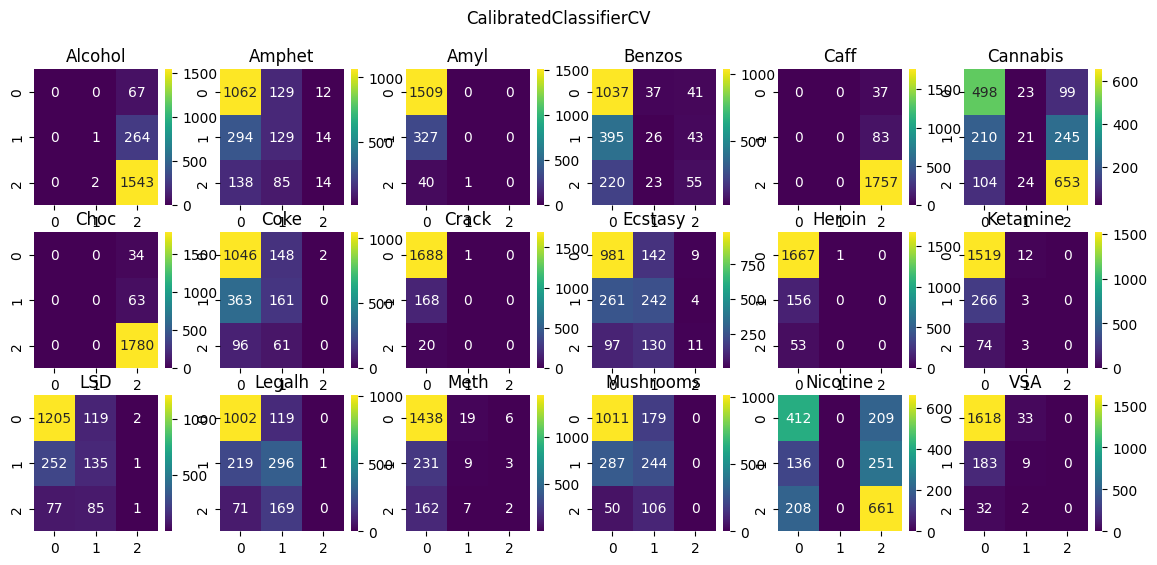

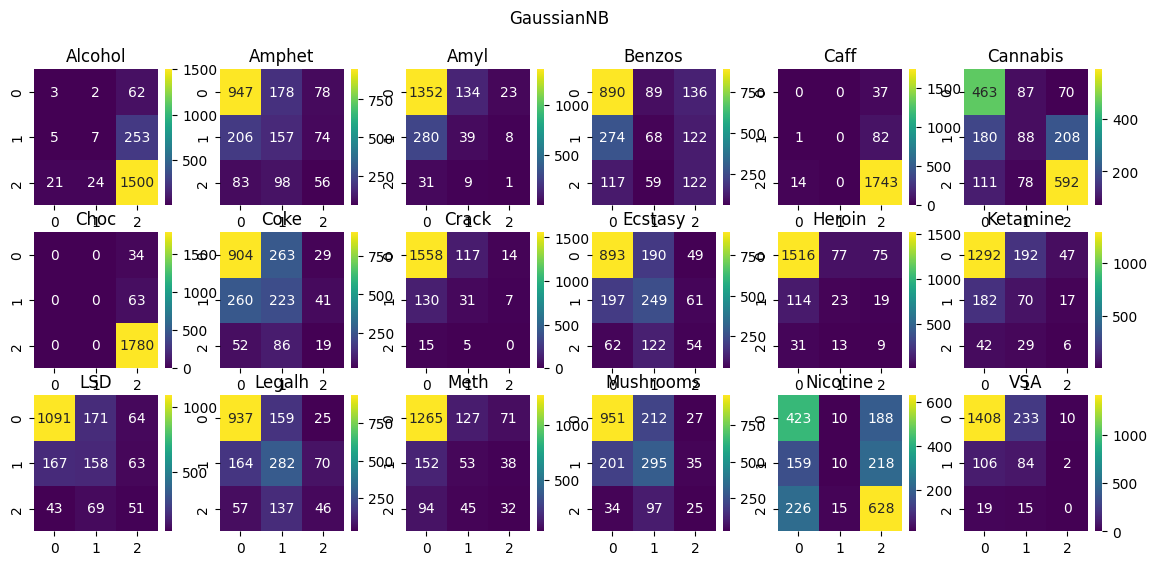

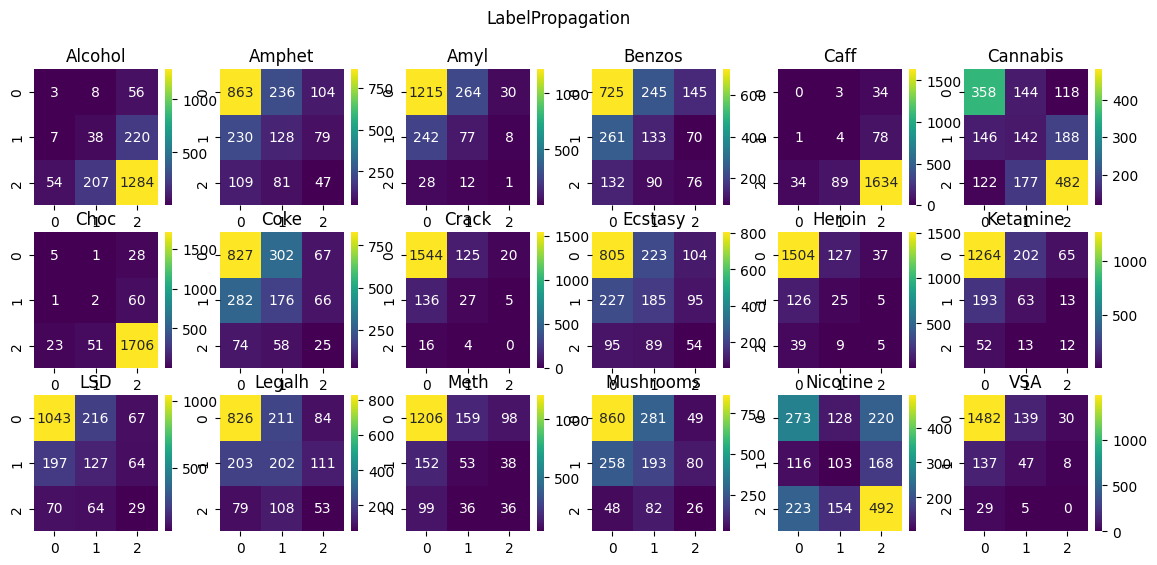

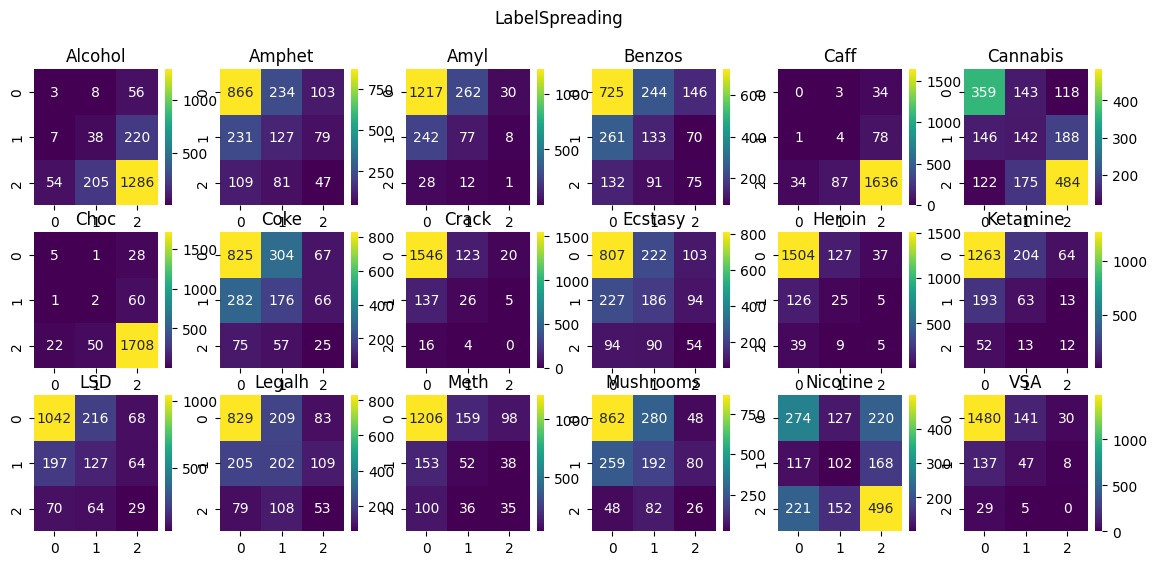

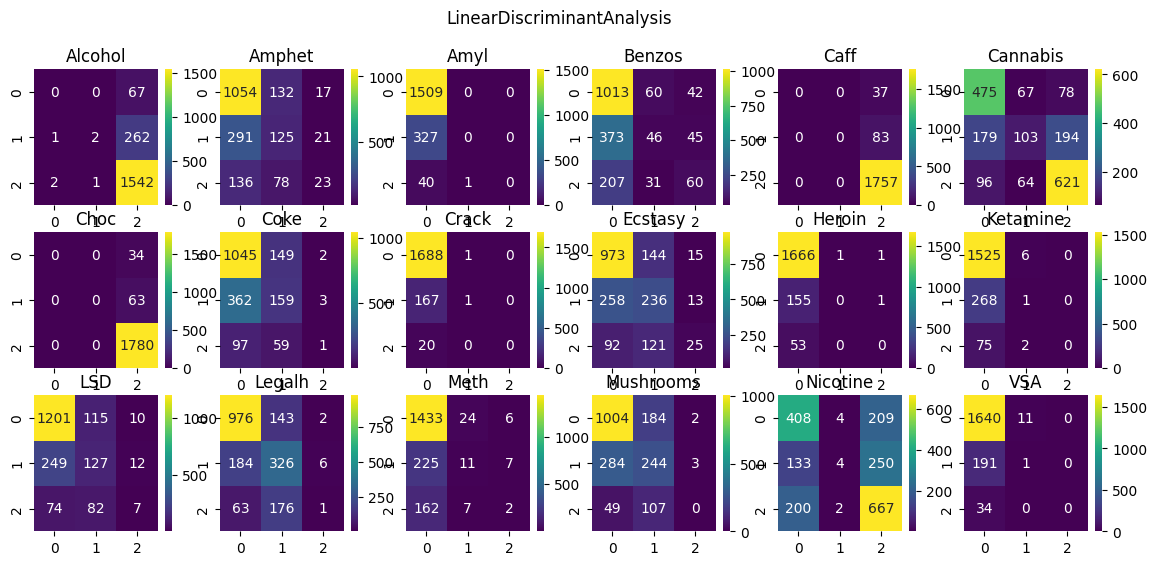

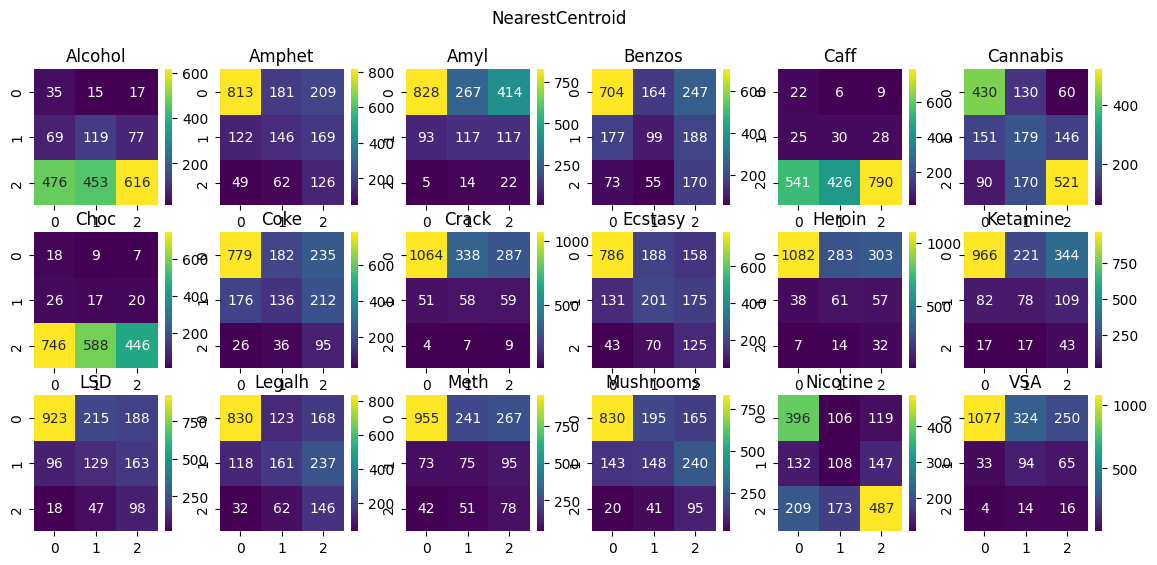

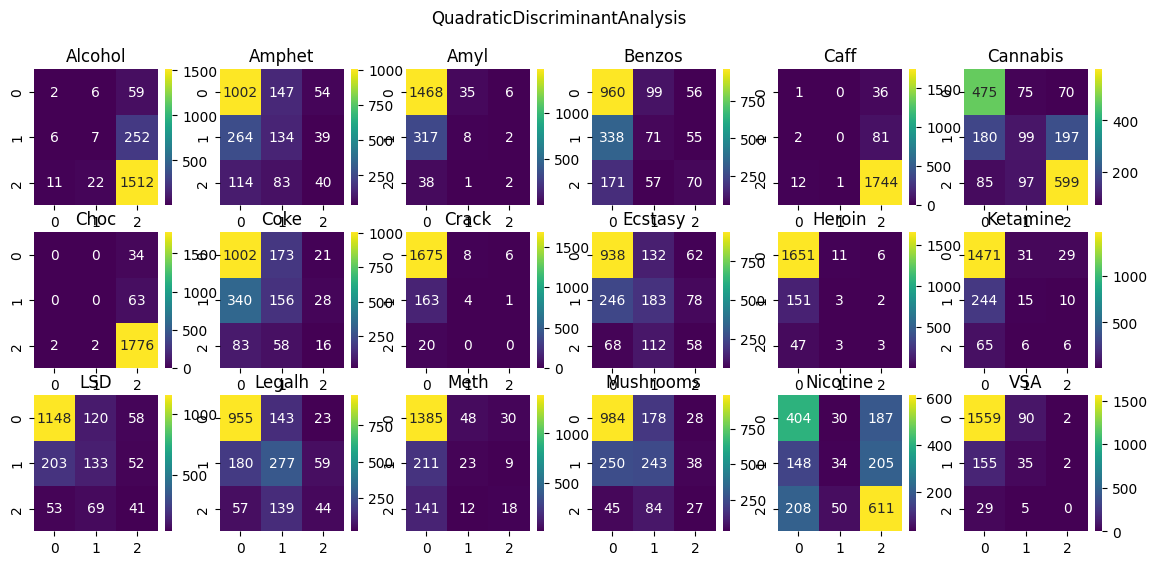

In [13]:
ut.confusion(cm)

## Tratando como Multilabel
Além de classificar somente como utilizado recentemente para detectar indivíduos que possam continuar a usar as substâncias mais frequentemente, podemos usar para identificar várias ao mesmo tempo, tentando assim, determinar se há algum padrão de uso.

/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
DecisionTreeClassifier  0.491294  0.036286  0.621410  0.042233  0.535417   
ExtraTreeClassifier     0.532115  0.045891  0.614131  0.028549  0.569816   
MLPClassifier           0.506944  0.019642  0.687618  0.048229  0.530054   
RandomForestClassifier  0.500000  0.000000  0.663298  0.046370  0.522633   

Substância                          Benzos                Caff            \
                             std      mean       std      mean       std   
Model                                                                      
DecisionTreeClassifier  0.043207  0.574905  0.045797  0.486413  0.005542   
ExtraTreeClassifier     0.031174  0.566615  0.035040  0.488043  0.006258   
MLPClassifier           0.027386  0.633197  0.036475  0.500000  0.000000   
RandomForestClassifier  0.016428  0.623818  0.037825  0.500000  0.000000   

Substância              Cannabis                Choc                Coke  \
                            mean       std      mean       std      mean   
Model                                                                      
DecisionTreeClassifier  0.677166  0.035069  0.512518  0.043540  0.572602   
ExtraTreeClassifier     0.667974  0.052337  0.514962  0.045818  0.561541   
MLPClassifier           0.745560  0.056517  0.499728  0.000769  0.646549   
RandomForestClassifier  0.741920  0.055516  0.500000  0.000000  0.632149   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
DecisionTreeClassifier  0.044520  0.536989  0.061532  0.637004  0.047171   
ExtraTreeClassifier     0.044923  0.532087  0.025477  0.616342  0.039219   
MLPClassifier           0.032001  0.504424  0.014457  0.719822  0.058558   
RandomForestClassifier  0.026231  0.501123  0.008135  0.711267  0.056402   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
DecisionTreeClassifier  0.538537  0.047655  0.533601  0.050881  0.648320   
ExtraTreeClassifier     0.549879  0.036331  0.549210  0.025542  0.630536   
MLPClassifier           0.521297  0.025214  0.536049  0.022779  0.704155   
RandomForestClassifier  0.513647  0.016745  0.517321  0.012592  0.687312   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
DecisionTreeClassifier  0.056091  0.679434  0.040367  0.564830  0.039329   
ExtraTreeClassifier     0.020263  0.676963  0.030945  0.573061  0.038669   
MLPClassifier           0.039515  0.762706  0.055989  0.590257  0.048638   
RandomForestClassifier  0.053374  0.753992  0.049367  0.559713  0.028087   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
DecisionTreeClassifier  0.614495  0.038372  0.583069  0.064884  0.566440   
ExtraTreeClassifier     0.651492  0.040570  0.570393  0.047374  0.557663   
MLPClassifier           0.700091  0.060886  0.635147  0.051308  0.542674   
RandomForestClassifier  0.683694  0.060410  0.652229  0.056015  0.521460   

Substância                        
                             std  
Model                             
DecisionTreeClassifier  0.034474  
ExtraTreeClassifier     0.054030  
MLPClassifier           0.038007  
RandomForestClassifier  0.018694

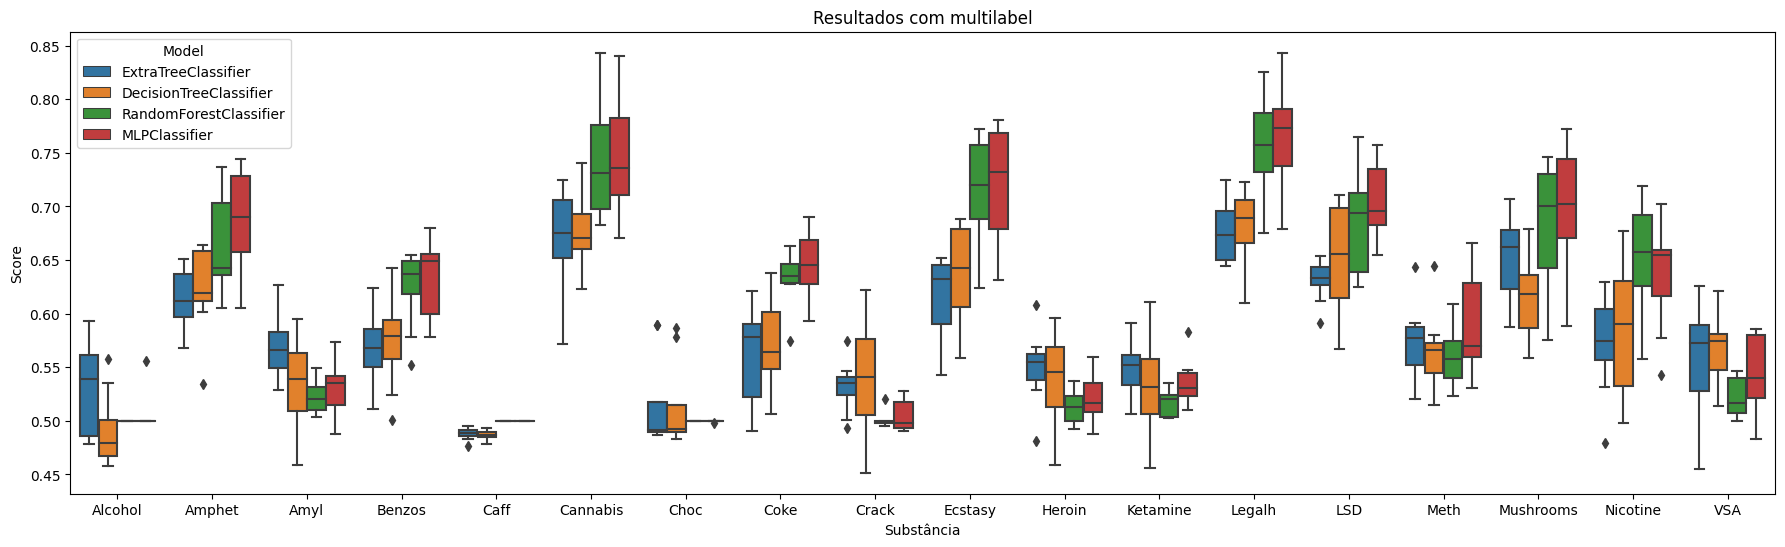

In [14]:
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier

labels = y.applymap(ut.threshold, t=[2])

results, cm = ut.test_classifiers(X, labels, classifiers=[ExtraTreeClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), MLPClassifier()])

ut.boxplot(results, f"Resultados com multilabel", lims=None, refs=None)
ut.show_statistics(results)

### Confusion Matrices

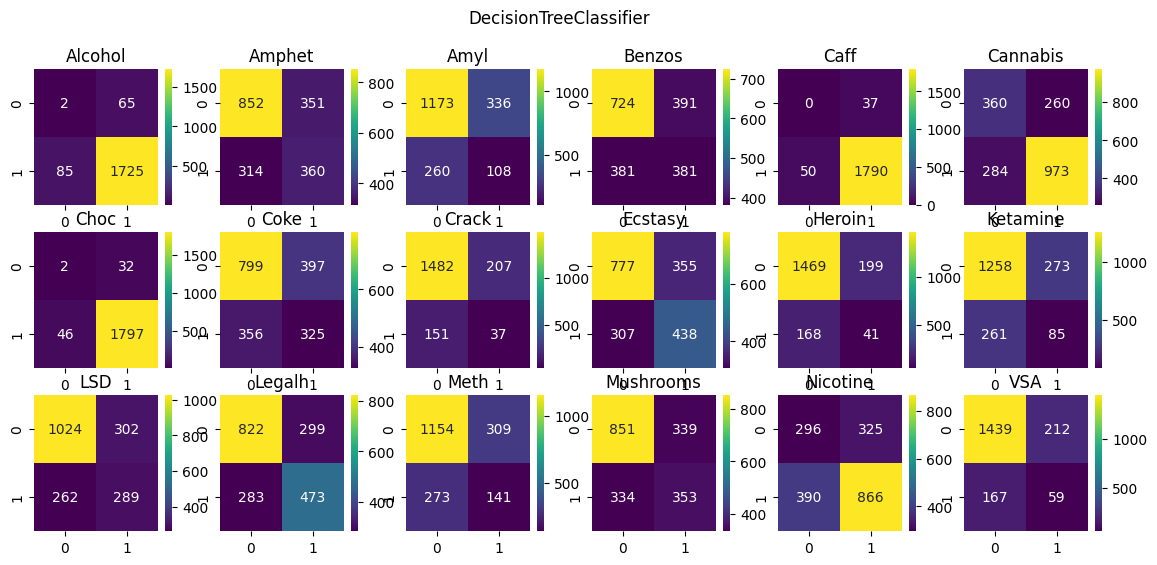

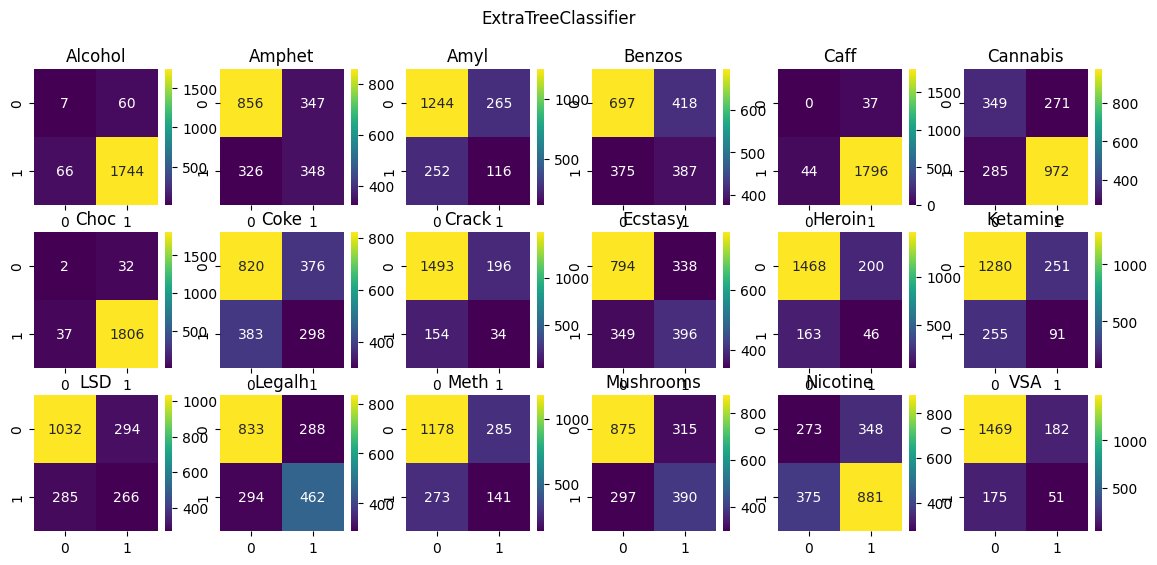

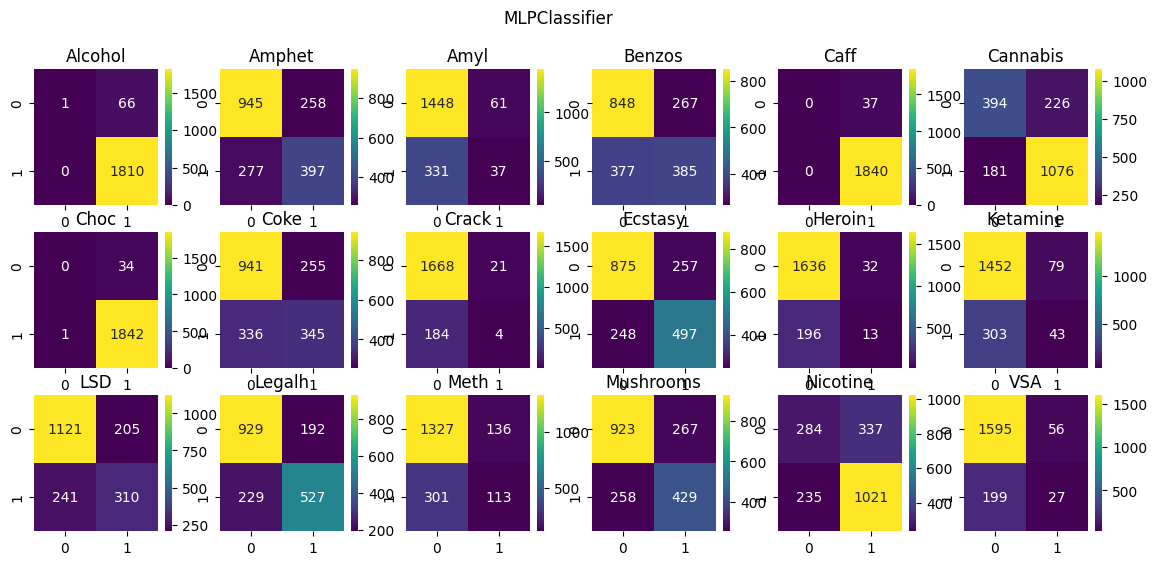

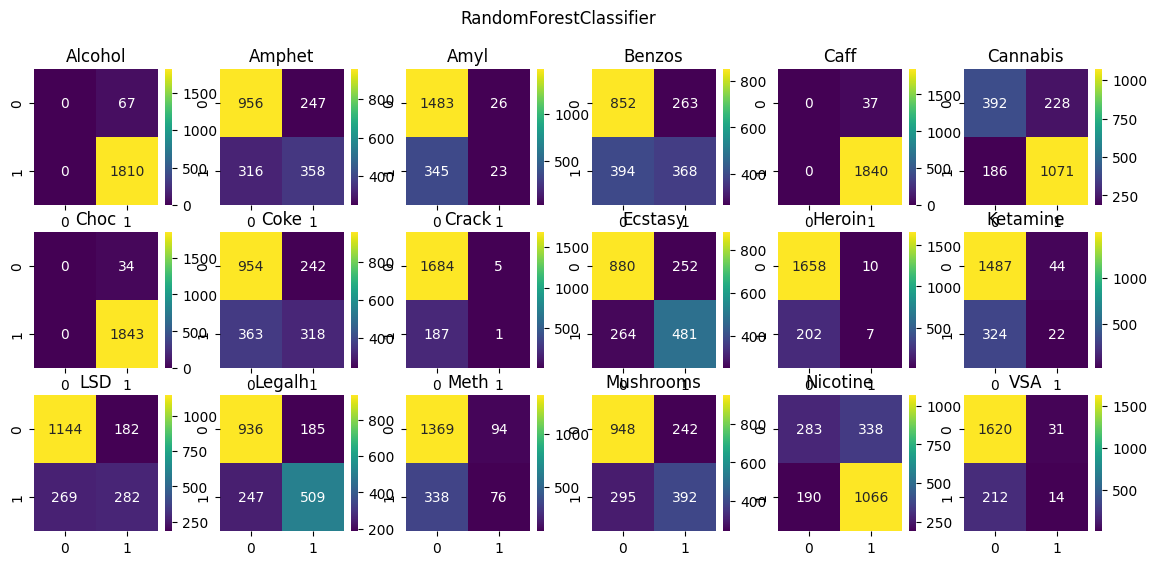

In [15]:
ut.confusion(cm)

## Tratando como Multiclasse & Multilabel

/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ngmonteiro/miniconda3/envs/py/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
DecisionTreeClassifier  0.391252  0.025194  0.396349  0.045475  0.348325   
ExtraTreeClassifier     0.358488  0.037516  0.416210  0.048494  0.398758   
MLPClassifier           0.352382  0.018085  0.428605  0.041887  0.358539   
RandomForestClassifier  0.333487  0.003968  0.400628  0.035258  0.337401   

Substância                          Benzos                Caff            \
                             std      mean       std      mean       std   
Model                                                                      
DecisionTreeClassifier  0.034967  0.393524  0.040146  0.331009  0.039458   
ExtraTreeClassifier     0.052046  0.394073  0.029858  0.318891  0.017934   
MLPClassifier           0.016647  0.421275  0.038432  0.332955  0.000701   
RandomForestClassifier  0.009827  0.390148  0.032401  0.333144  0.000536   

Substância              Cannabis                Choc                Coke  \
                            mean       std      mean       std      mean   
Model                                                                      
DecisionTreeClassifier  0.513267  0.024385  0.350249  0.052721  0.408237   
ExtraTreeClassifier     0.465069  0.032755  0.357357  0.069724  0.389018   
MLPClassifier           0.568873  0.051559  0.332960  0.000692  0.408019   
RandomForestClassifier  0.567813  0.050612  0.333333  0.000000  0.399244   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
DecisionTreeClassifier  0.042721  0.350573  0.024124  0.446612  0.032412   
ExtraTreeClassifier     0.037922  0.341066  0.016839  0.409424  0.040874   
MLPClassifier           0.026822  0.336128  0.007238  0.466187  0.017827   
RandomForestClassifier  0.017819  0.334923  0.005163  0.454431  0.019722   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
DecisionTreeClassifier  0.364454  0.045430  0.365100  0.041103  0.419070   
ExtraTreeClassifier     0.357196  0.040291  0.386556  0.050316  0.412907   
MLPClassifier           0.342054  0.015798  0.348232  0.006333  0.435967   
RandomForestClassifier  0.334417  0.006395  0.338197  0.003354  0.421331   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
DecisionTreeClassifier  0.059274  0.473060  0.041968  0.374398  0.016964   
ExtraTreeClassifier     0.050108  0.445578  0.041870  0.379426  0.036747   
MLPClassifier           0.036396  0.520868  0.048007  0.383273  0.034035   
RandomForestClassifier  0.023184  0.492355  0.057983  0.360366  0.020508   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
DecisionTreeClassifier  0.428960  0.031465  0.413607  0.041841  0.374107   
ExtraTreeClassifier     0.414314  0.022719  0.393067  0.032310  0.339512   
MLPClassifier           0.464714  0.035525  0.467690  0.049090  0.346118   
RandomForestClassifier  0.437608  0.036542  0.482627  0.052538  0.331548   

Substância                        
                             std  
Model                             
DecisionTreeClassifier  0.043798  
ExtraTreeClassifier     0.036218  
MLPClassifier           0.024658  
RandomForestClassifier  0.010615

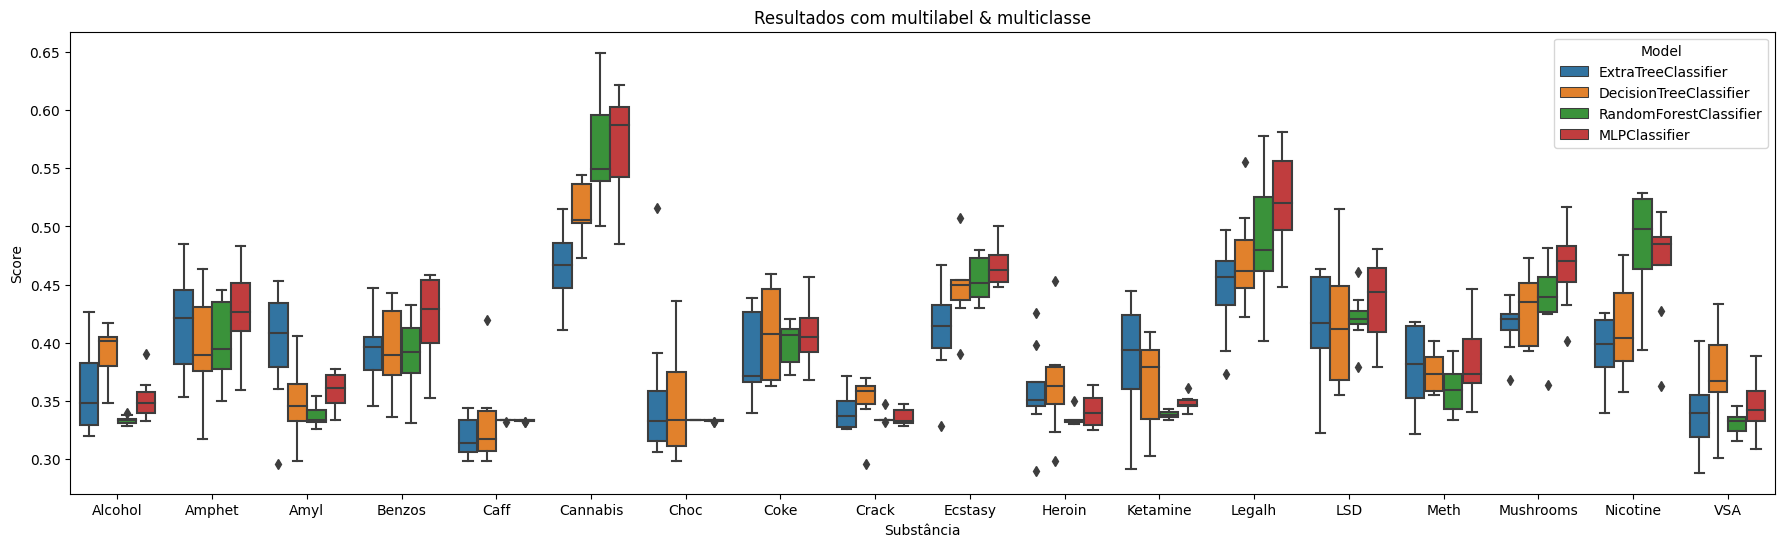

In [16]:
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier

labels = y.applymap(ut.threshold, t=[2, 4])

results, cm = ut.test_classifiers(X, labels, classifiers=[ExtraTreeClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), MLPClassifier()])

ut.boxplot(results, f"Resultados com multilabel & multiclasse", lims=None, refs=None)
ut.show_statistics(results)

### Confusion Matrices

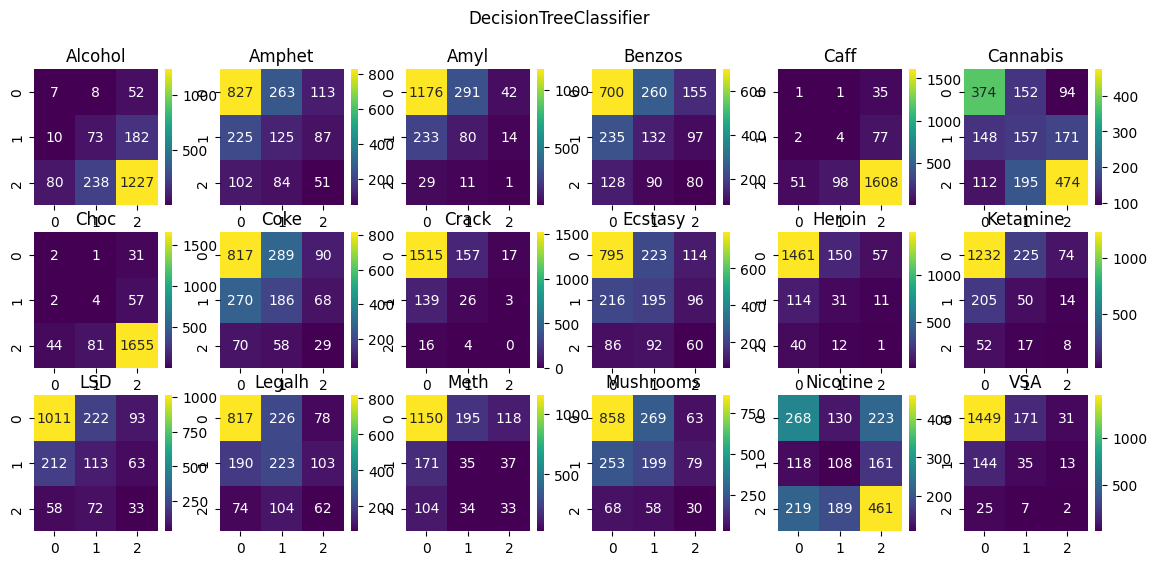

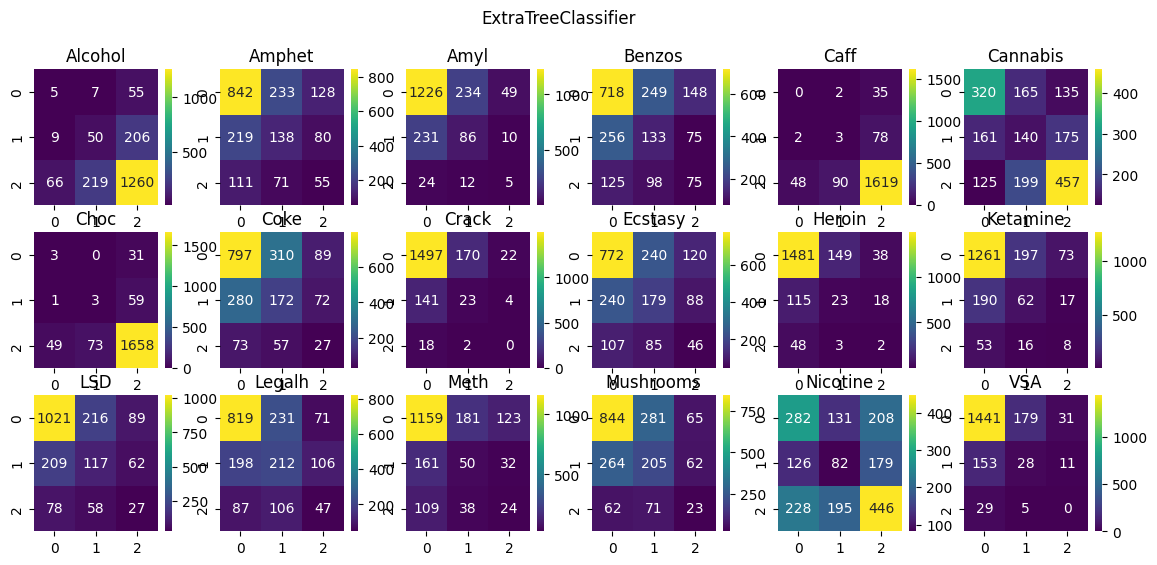

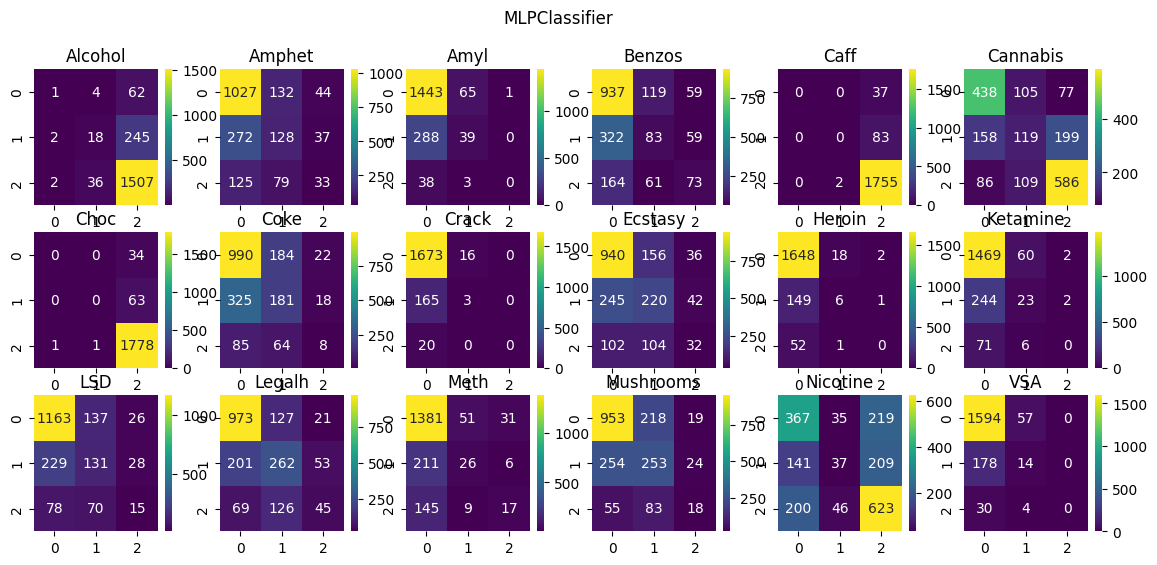

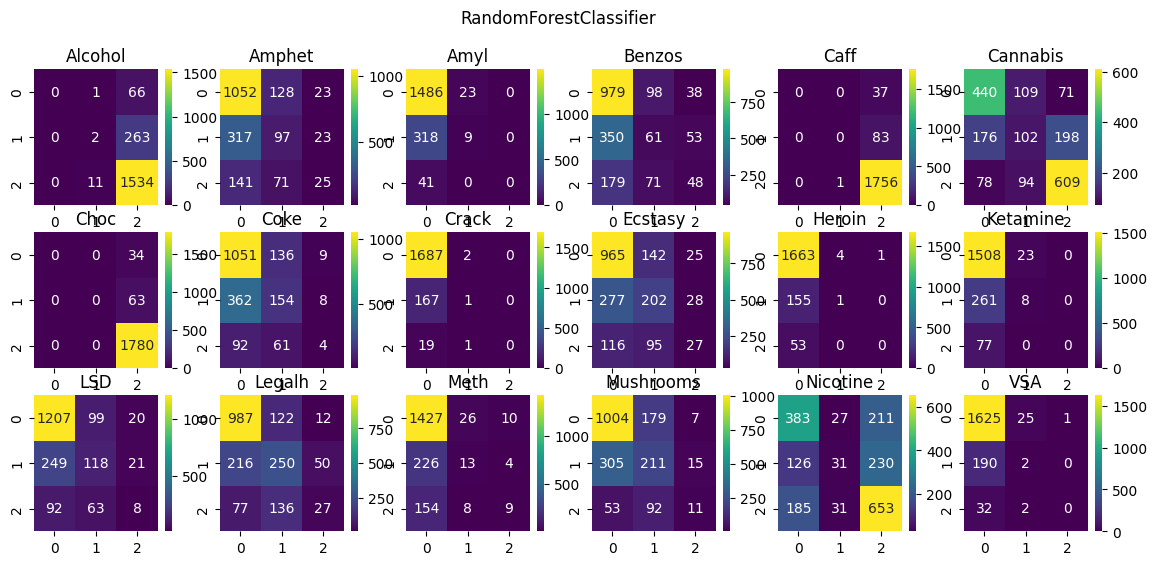

In [17]:
ut.confusion(cm)